In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [369]:
df = pd.read_csv('ch2.csv')
df.head()

,PhysicalActivity,HeartDisease,Race,AgeCategory,BMI,AlcoholDrinking,PhysicalHealth,MentalHealth,SleepTime,Stroke,Asthma,SkinCancer,KidneyDisease,Diabetic,DiffWalking,Smoking,Sex,GenHealth
0,Yes,No,White,55 to 59,1660.0,No,3.0,30.0,5.0,No,No,Yes,Yes,Yes,No,Yes,Female,Very Good
1,Yes,No,Black,65 to 69,2918.0,Missing,88.0,88.0,7.0,No,No,No,Yes,No,No,NaN,Female,Good
2,Yes,No,Black,65 to 69,NaN,No,88.0,88.0,7.0,No,Yes,No,Yes,No,No,No,Female,Good
3,No,No,White,80 plus,NaN,No,88.0,88.0,6.0,No,Yes,No,Yes,No,No,No,Female,Excellent
4,Yes,No,White,80 plus,2034.0,No,88.0,88.0,7.0,Yes,Yes,No,Yes,No,No,No,Female,Very Good


## Understanding the Data

In [370]:
df.shape

(401958, 18)

- Our dataset has 18 variables and 401958 records in it
- All 18 variables are listed below

In [371]:
variables = df.columns

In [372]:
for i in range(len(variables)):
    print(variables[i])

PhysicalActivity
HeartDisease
Race
AgeCategory
BMI
AlcoholDrinking
PhysicalHealth
MentalHealth
SleepTime
Stroke
Asthma
SkinCancer
KidneyDisease
Diabetic
DiffWalking
Smoking
Sex
GenHealth


### Checking for Non-Standard missing values using value counts of each variable 

In [373]:
for i in range(len(variables)):
    print(variables[i])
    print(df[variables[i]].value_counts())
    print()

PhysicalActivity
Yes        305883
No          95393
Missing       682
Name: PhysicalActivity, dtype: int64

HeartDisease
No     364224
Yes     34163
Name: HeartDisease, dtype: int64

Race
White              295900
Hispanic            36322
Black               30130
Asian only          10138
Not sure             8987
Multiracial          8314
American Indian      6813
Other                3344
Hawaiian             2009
Name: Race, dtype: int64

AgeCategory
65 to 69    41570
60 to 64    41151
70 to 74    37972
55 to 59    36219
80 plus     31456
50 to 54    31110
75 to 79    26607
45 to 49    26428
40 to 44    25729
18 to 24    25648
35 to 39    25492
30 to 34    23408
25 to 29    20911
Missing      8257
Name: AgeCategory, dtype: int64

BMI
2663.0    4233
2744.0    3099
2746.0    3076
2441.0    3042
2712.0    2904
          ... 
4989.0       1
5033.0       1
3739.0       1
5945.0       1
4656.0       1
Name: BMI, Length: 3769, dtype: int64

AlcoholDrinking
No         347309
Missing     

The below listed varibles have Non-Standard Missing values in them
- PhysicalActivity
- AgeCategory
- AlcoholDrinking
- Stroke
- Asthma
- SkinCancer
- KidneyDisease
- Diabetic
- DiffWalking
- Smoking

Non-Standard missing values are replaced with np.NaN, so that it can be identified and dealt by python

### Replacing all Non-Standard missing values using np.NaN

In [374]:
df.replace(['Missing', 'Not sure', 'Refused'], [np.NaN, np.NaN, np.NaN], inplace = True)

In [375]:
for i in range(len(variables)):
    print(variables[i])
    print(df[variables[i]].value_counts())
    print()

PhysicalActivity
Yes    305883
No      95393
Name: PhysicalActivity, dtype: int64

HeartDisease
No     364224
Yes     34163
Name: HeartDisease, dtype: int64

Race
White              295900
Hispanic            36322
Black               30130
Asian only          10138
Multiracial          8314
American Indian      6813
Other                3344
Hawaiian             2009
Name: Race, dtype: int64

AgeCategory
65 to 69    41570
60 to 64    41151
70 to 74    37972
55 to 59    36219
80 plus     31456
50 to 54    31110
75 to 79    26607
45 to 49    26428
40 to 44    25729
18 to 24    25648
35 to 39    25492
30 to 34    23408
25 to 29    20911
Name: AgeCategory, dtype: int64

BMI
2663.0    4233
2744.0    3099
2746.0    3076
2441.0    3042
2712.0    2904
          ... 
4989.0       1
5033.0       1
3739.0       1
5945.0       1
4656.0       1
Name: BMI, Length: 3769, dtype: int64

AlcoholDrinking
No     347309
Yes     23958
Name: AlcoholDrinking, dtype: int64

PhysicalHealth
88.0    278671
30.0 

### The DataFrame is checked for missing values 

In [376]:
df.isnull().sum()

PhysicalActivity      682
HeartDisease         3571
Race                 8988
AgeCategory          8257
BMI                 41357
AlcoholDrinking     30691
PhysicalHealth          5
MentalHealth            5
SleepTime               3
Stroke               1186
Asthma               1367
SkinCancer           1275
KidneyDisease        1516
Diabetic              814
DiffWalking         16759
Smoking             20673
Sex                     0
GenHealth             961
dtype: int64

Almost every variable has missing values in it except 'Sex' variable

### Records containing null value in more than or equal to 9 (50%) variables are deleted

In [377]:
missing_rows = df.isnull().sum(axis = 1)

In [378]:
rows_to_drop = missing_rows[missing_rows>=9].index

In [379]:
df.drop(rows_to_drop, inplace = True)

In [380]:
df.shape

(401818, 18)

In [381]:
df.isnull().sum()

PhysicalActivity      642
HeartDisease         3439
Race                 8895
AgeCategory          8138
BMI                 41231
AlcoholDrinking     30574
PhysicalHealth          2
MentalHealth            2
SleepTime               0
Stroke               1051
Asthma               1231
SkinCancer           1139
KidneyDisease        1380
Diabetic              680
DiffWalking         16665
Smoking             20568
Sex                     0
GenHealth             937
dtype: int64

### Variables having missing values after deleting the rows with 50% null values are imputed induvidually in an appropriate manner

In [382]:
PhysicalActivity_VC = df.groupby('Race')['PhysicalActivity'].value_counts()

In [383]:
PhysicalActivity_VC['American Indian']['No']

2038

In [384]:
PhysicalActivity_VC

Race             PhysicalActivity
American Indian  Yes                   4759
                 No                    2038
Asian only       Yes                   8058
                 No                    2071
Black            Yes                  20937
                 No                    9143
Hawaiian         Yes                   1537
                 No                     470
Hispanic         Yes                  24633
                 No                   11635
Multiracial      Yes                   6471
                 No                    1817
Other            Yes                   2450
                 No                     884
White            Yes                 230293
                 No                   65150
Name: PhysicalActivity, dtype: int64

In [385]:
# Phyiscal Activity of an individual can either be Yes or No. So missing values are values can be treated.
# Mode of Physical Activity for every Race is Yes
# So the null values are imputed with Mode(Yes)

In [386]:
df['PhysicalActivity'].replace(np.NaN, 'Yes', inplace = True)

In [387]:
df['PhysicalActivity'].isnull().sum()

0

In [388]:
df.groupby('Race')['Stroke'].value_counts()

Race             Stroke
American Indian  No          6389
                 Yes          402
Asian only       No          9940
                 Yes          175
Black            No         28373
                 Yes         1683
Hawaiian         No          1920
                 Yes           83
Hispanic         No         35413
                 Yes          799
Multiracial      No          7854
                 Yes          426
Other            No          3188
                 Yes          138
White            No        283555
                 Yes        11596
Name: Stroke, dtype: int64

In [389]:
# Occurance of Stroke for an individual can either be Yes or No. So missing values are values can be treated.
# Mode of Stroke for every Race is 'No'
# So the null values are imputed with Mode(No)

In [390]:
df['Stroke'].replace(np.NaN, 'No', inplace = True)

In [391]:
df['Stroke'].isnull().sum()

0

In [392]:
df.groupby('Race')['SkinCancer'].value_counts()

Race             SkinCancer
American Indian  No              6580
                 Yes              218
Asian only       No             10045
                 Yes               73
Black            No             29914
                 Yes              176
Hawaiian         No              1990
                 Yes               14
Hispanic         No             35751
                 Yes              528
Multiracial      No              7878
                 Yes              405
Other            No              3118
                 Yes              209
White            No            260813
                 Yes            34123
Name: SkinCancer, dtype: int64

In [393]:
# Skin cancer detected for an individual can either be Yes or No. So missing values are values can be treated.
# Mode of Skin cancer detected for every Race is 'No'
# So the null values are imputed with Mode(No)

In [394]:
df['SkinCancer'].replace(np.NaN, 'No', inplace = True)

In [395]:
df['SkinCancer'].isnull().sum()

0

In [396]:
df.groupby('Race')['Asthma'].value_counts()

Race             Asthma
American Indian  Yes         5609
                 No          1178
Asian only       Yes         9163
                 No           930
Black            Yes        25258
                 No          4803
Hawaiian         Yes         1722
                 No           283
Hispanic         Yes        31387
                 No          4837
Multiracial      Yes         6496
                 No          1780
Other            Yes         2864
                 No           463
White            Yes       256333
                 No         38658
Name: Asthma, dtype: int64

In [397]:
# Asthma detected for an individual can either be Yes or No. So missing values are values can be treated.
# Mode of Asthma detected for every Race is 'Yes'
# So the null values are imputed with Mode(Yes)

In [398]:
df['Asthma'].replace(np.NaN, 'Yes', inplace = True)

In [399]:
df['Asthma'].isnull().sum()

0

In [400]:
df.isnull().sum()

PhysicalActivity        0
HeartDisease         3439
Race                 8895
AgeCategory          8138
BMI                 41231
AlcoholDrinking     30574
PhysicalHealth          2
MentalHealth            2
SleepTime               0
Stroke                  0
Asthma                  0
SkinCancer              0
KidneyDisease        1380
Diabetic              680
DiffWalking         16665
Smoking             20568
Sex                     0
GenHealth             937
dtype: int64

In [401]:
# Dropping the rows which doesn't have BMI values in it.

In [402]:
df.dropna(subset = ['BMI'], inplace = True)

In [403]:
df.BMI.isnull().sum()

0

In [404]:
df.shape

(360587, 18)

In [405]:
# Dropping the rows which is null in HeartDisease column.

In [406]:
df.dropna(subset = ['HeartDisease'], inplace = True)

In [407]:
df.HeartDisease.isnull().sum()

0

In [408]:
df.shape

(357637, 18)

In [409]:
# Checking for the null values after dropping the columns with null values in BMI and HeartDisease

In [410]:
df.isnull().sum()

PhysicalActivity        0
HeartDisease            0
Race                 6225
AgeCategory          4021
BMI                     0
AlcoholDrinking     15646
PhysicalHealth          2
MentalHealth            2
SleepTime               0
Stroke                  0
Asthma                  0
SkinCancer              0
KidneyDisease         993
Diabetic              404
DiffWalking          4345
Smoking              7505
Sex                     0
GenHealth             682
dtype: int64

In [411]:
# Checking the percentage of missing values in every column

In [412]:
round(df.isnull().sum()/df.shape[0]*100, 2)

PhysicalActivity    0.00
HeartDisease        0.00
Race                1.74
AgeCategory         1.12
BMI                 0.00
AlcoholDrinking     4.37
PhysicalHealth      0.00
MentalHealth        0.00
SleepTime           0.00
Stroke              0.00
Asthma              0.00
SkinCancer          0.00
KidneyDisease       0.28
Diabetic            0.11
DiffWalking         1.21
Smoking             2.10
Sex                 0.00
GenHealth           0.19
dtype: float64

In [413]:
df.groupby('Race')['AlcoholDrinking'].value_counts()

Race             AlcoholDrinking
American Indian  No                   5326
                 Yes                   339
Asian only       No                   8139
                 Yes                   276
Black            No                  23712
                 Yes                  1090
Hawaiian         No                   1604
                 Yes                   144
Hispanic         No                  27559
                 Yes                  1599
Multiracial      No                   6658
                 Yes                   564
Other            No                   2429
                 Yes                   166
White            No                 238320
                 Yes                 18423
Name: AlcoholDrinking, dtype: int64

In [414]:
# AlcoholDrinking for an individual can either be Yes or No. So missing values are values can be treated.
# Mode of AlcoholDrinking for every Race is 'No'
# So the null values are imputed with Mode(No)

In [415]:
df['AlcoholDrinking'].replace(np.NaN, 'No', inplace = True)

In [416]:
df['AlcoholDrinking'].isnull().sum()

0

In [417]:
df.groupby('Race')['KidneyDisease'].value_counts()

Race             KidneyDisease
American Indian  Yes                5732
                 No                  282
Asian only       Yes                8670
                 No                  151
Black            Yes               25267
                 No                 1195
Hawaiian         Yes                1766
                 No                   63
Hispanic         Yes               29825
                 No                  936
Multiracial      Yes                7240
                 No                  279
Other            Yes                2686
                 No                   95
White            Yes              256109
                 No                10158
Name: KidneyDisease, dtype: int64

In [418]:
# KidneyDisease detected for an individual can either be Yes or No. So missing values are values can be treated.
# Mode of KidneyDisease detected for every Race is 'Yes'
# So the null values are imputed with Mode(Yes)

In [419]:
df['KidneyDisease'].replace(np.NaN, 'No', inplace = True)

In [420]:
df['KidneyDisease'].isnull().sum()

0

In [421]:
df.groupby('Race')['Diabetic'].value_counts()

Race             Diabetic        
American Indian  No                    4752
                 Yes                   1206
                 During Pregnancy        63
Asian only       No                    7856
                 Yes                    856
                 During Pregnancy       102
Black            No                   21101
                 Yes                   5207
                 During Pregnancy       201
Hawaiian         No                    1489
                 Yes                    307
                 During Pregnancy        34
Hispanic         No                   26252
                 Yes                   4168
                 During Pregnancy       359
Multiracial      No                    6454
                 Yes                    994
                 During Pregnancy        88
Other            No                    2380
                 Yes                    385
                 During Pregnancy        20
White            No                  23234

In [422]:
# Diabetic detected for an individual can either be Yes or No. So missing values are values can be treated.
# Mode of Diabetic detected for every Race is 'No'
# So the null values are imputed with Mode(No)

In [423]:
df['Diabetic'].replace(np.NaN, 'No', inplace = True)

In [424]:
df['Diabetic'].isnull().sum()

0

In [425]:
df.groupby('Race')['DiffWalking'].value_counts()

Race             DiffWalking
American Indian  No               4654
                 Yes              1285
Asian only       No               8214
                 Yes               494
Black            No              20929
                 Yes              5169
Hawaiian         No               1563
                 Yes               245
Hispanic         No              26294
                 Yes              4142
Multiracial      No               6189
                 Yes              1281
Other            No               2283
                 Yes               449
White            No             226218
                 Yes             37816
Name: DiffWalking, dtype: int64

In [426]:
# DiffWalking reported for an individual can either be Yes or No. So missing values are values can be treated.
# Mode of DiffWalking reported for every Race is 'No'
# So the null values are imputed with Mode(No)

In [427]:
df['DiffWalking'].replace(np.NaN, 'No', inplace = True)

In [428]:
df['DiffWalking'].isnull().sum()

0

In [429]:
df.groupby('Race')['Smoking'].value_counts()

Race             Smoking
American Indian  Yes          3248
                 No           2618
Asian only       No           6655
                 Yes          1962
Black            No          16665
                 Yes          9095
Hawaiian         No           1086
                 Yes           703
Hispanic         No          20795
                 Yes          9333
Multiracial      No           3828
                 Yes          3579
Other            No           1460
                 Yes          1223
White            No         147435
                 Yes        114494
Name: Smoking, dtype: int64

In [430]:
# Smoked 100 cigs for an individual can either be Yes or No. So missing values are values can be treated.
# Mode of Smoked 100 cigs for every Race is 'Yes'
# So the null values are imputed with Mode(Yes)

In [431]:
df['Smoking'].replace(np.NaN, 'No', inplace = True)

In [432]:
df['Smoking'].isnull().sum()

0

In [433]:
df.AgeCategory.isnull().sum()

4021

In [434]:
df.AgeCategory.mode()

0    65 to 69
dtype: object

In [435]:
# AgeCategory for an individual cannot be null. So missing values are values can be treated.
# Mode of AgeCategory is '65 to 69'
# So the null values are imputed with Mode(65 to 69)

In [436]:
df['AgeCategory'].replace(np.NaN, '65 to 69', inplace = True)

In [437]:
df.AgeCategory.isnull().sum()

0

In [438]:
df.GenHealth.isnull().sum()

682

In [439]:
df.GenHealth.mode()

0    Very Good
dtype: object

In [440]:
# GenHealth for an individual cannot be null. So missing values are values can be treated.
# Mode of GenHealth is 'Very Good'
# So the null values are imputed with Mode(Very Good)

In [441]:
df['GenHealth'].replace(np.NaN, 'Very Good', inplace = True)

In [442]:
df.GenHealth.isnull().sum()

0

In [443]:
df.Race.isnull().sum()

6225

In [444]:
df.Race.mode()

0    White
dtype: object

In [445]:
# Race for an individual cannot be null. So missing values are values can be treated.
# Mode of Race is 'White'
# So the null values are imputed with Mode(White)

In [446]:
df['Race'].replace(np.NaN, 'White', inplace = True)

In [447]:
df.Race.isnull().sum()

0

In [448]:
df.isnull().sum()

PhysicalActivity    0
HeartDisease        0
Race                0
AgeCategory         0
BMI                 0
AlcoholDrinking     0
PhysicalHealth      2
MentalHealth        2
SleepTime           0
Stroke              0
Asthma              0
SkinCancer          0
KidneyDisease       0
Diabetic            0
DiffWalking         0
Smoking             0
Sex                 0
GenHealth           0
dtype: int64

In [449]:
df.dropna(subset = ['PhysicalHealth'], inplace = True)
df.dropna(subset = ['MentalHealth'], inplace = True)

#### Checking for the missing value count after all missing value treatment is done to make sure there is no missing values in the data

In [450]:
df.isnull().sum()

PhysicalActivity    0
HeartDisease        0
Race                0
AgeCategory         0
BMI                 0
AlcoholDrinking     0
PhysicalHealth      0
MentalHealth        0
SleepTime           0
Stroke              0
Asthma              0
SkinCancer          0
KidneyDisease       0
Diabetic            0
DiffWalking         0
Smoking             0
Sex                 0
GenHealth           0
dtype: int64

All the missing values are treated successfully

In [451]:
df.head()

,PhysicalActivity,HeartDisease,Race,AgeCategory,BMI,AlcoholDrinking,PhysicalHealth,MentalHealth,SleepTime,Stroke,Asthma,SkinCancer,KidneyDisease,Diabetic,DiffWalking,Smoking,Sex,GenHealth
0,Yes,No,White,55 to 59,1660.0,No,3.0,30.0,5.0,No,No,Yes,Yes,Yes,No,Yes,Female,Very Good
1,Yes,No,Black,65 to 69,2918.0,No,88.0,88.0,7.0,No,No,No,Yes,No,No,No,Female,Good
4,Yes,No,White,80 plus,2034.0,No,88.0,88.0,7.0,Yes,Yes,No,Yes,No,No,No,Female,Very Good
5,Yes,No,White,65 to 69,2658.0,No,20.0,30.0,8.0,No,No,No,Yes,Yes,No,Yes,Male,Fair
6,No,No,White,75 to 79,2421.0,No,88.0,88.0,6.0,No,Yes,Yes,Yes,No,No,No,Female,Good


## Description of variables

- **HeartDisease** - Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- **BMI** - Body Mass Index (BMI)
- **Smoking** - Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
- **AlcoholDrinking** - Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- **Stroke** - (Ever told) (you had) a stroke?
- **PhysicalHealth** - Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days
- **MentalHealth** - Thinking about your mental health, for how many days during the past 30 days was your mental health not good? 
- **DiffWalking** - Do you have serious difficulty walking or climbing stairs?
- **Sex** - Are you male or female?
- **AgeCategory** - Fourteen-level age category
- **Race** - Imputed race/ethnicity value
- **Diabetic** - (Ever told) (you had) diabetes?
- **PhysicalActivity** - Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- **GenHealth** - Would you say that in general your health is...
- **SleepTime** - On average, how many hours of sleep do you get in a 24-hour period?
- **Asthma** - (Ever told) (you had) asthma?
- **KidneyDisease** - Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- **SkinCancer** - (Ever told) (you had) skin cancer?

## Descriptive Statistics

In [452]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,357633.000000,357633.000000,357633.000000,357633.000000
mean,2830.170314,65.914826,61.042099,7.778544
std,637.603047,34.962499,37.105424,7.171650
min,1202.000000,1.000000,1.000000,1.000000
25%,2399.000000,30.000000,15.000000,6.000000
50%,2732.000000,88.000000,88.000000,7.000000
75%,3138.000000,88.000000,88.000000,8.000000
max,9843.000000,99.000000,99.000000,99.000000


- BMI values are not in the correct format. It has to be divided by 1000 to get the original BMI Value
- PhysicalHealth, MentalHealth and SleepTime varibles have some unusual values. Let us check it's distribution to have proper understanding

In [453]:
df.describe(include = 'object')

,PhysicalActivity,HeartDisease,Race,AgeCategory,AlcoholDrinking,Stroke,Asthma,SkinCancer,KidneyDisease,Diabetic,DiffWalking,Smoking,Sex,GenHealth
count,357633,357633,357633,357633,357633,357633,357633,357633,357633,357633,357633,357633,357633,357633
unique,2,2,8,13,2,2,2,2,2,3,2,2,2,5
top,Yes,No,White,65 to 69,No,No,Yes,No,Yes,No,No,No,Female,Very Good
freq,274875,325968,273196,41552,334732,343529,309571,324366,343252,308417,305777,211432,186851,125054


#### BMI Variable has to be divided by 100 to get the correct BMI Value

In [454]:
df.BMI = df.BMI/100

In [455]:
df.BMI.head()

0    16.60
1    29.18
4    20.34
5    26.58
6    24.21
Name: BMI, dtype: float64

**Understanding the distribution of BMI variable**

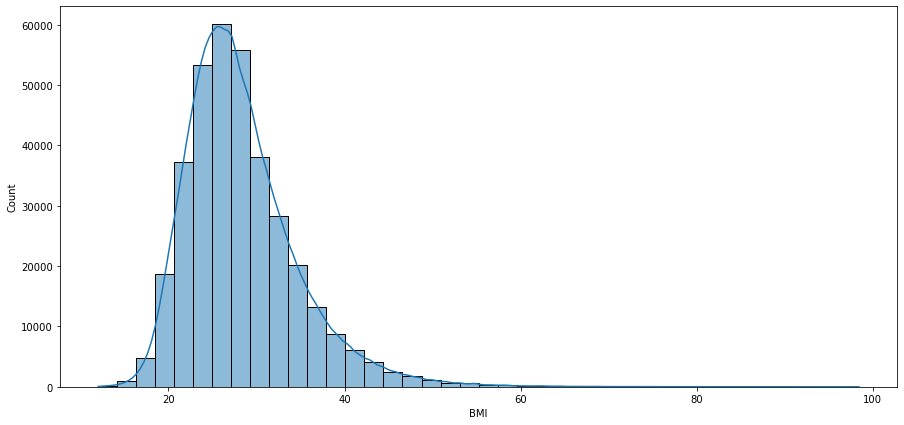

In [456]:
plt.rcParams['figure.figsize'] = [15,7]
sns.histplot(df.BMI, bins = 40, kde = True)
plt.show()

In [457]:
df.BMI.skew()

1.363526611663066

BMI is heavily positively skewed

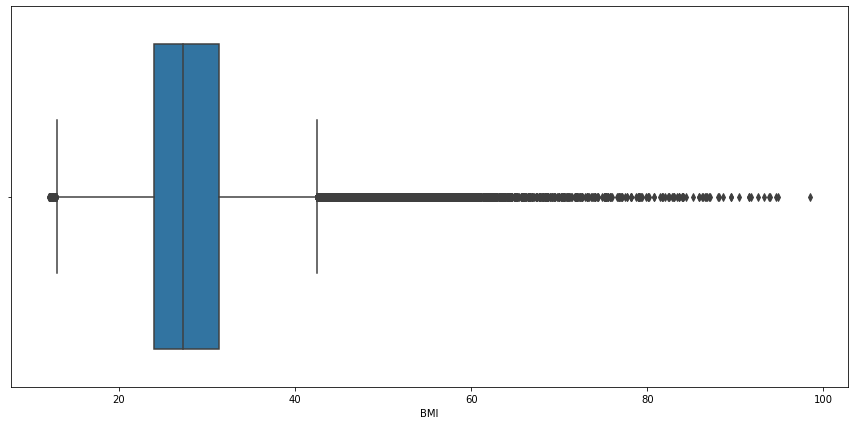

In [458]:
sns.boxplot(x = df.BMI)
plt.show()

There are many outliers present in BMI Variable

**Understanding the distribution of PhysicalHealth variable**

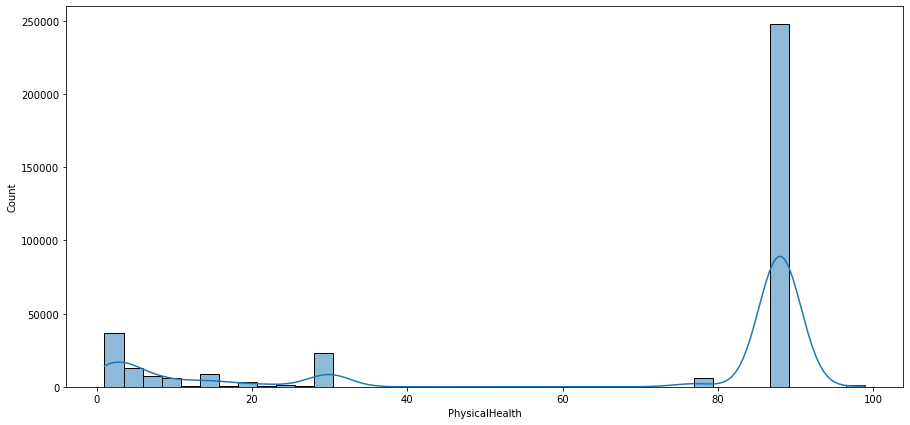

In [459]:
plt.rcParams['figure.figsize'] = [15,7]
sns.histplot(df.PhysicalHealth, bins = 40, kde = True)
plt.show()

In [460]:
df.PhysicalHealth.value_counts()

88.0    247641
30.0     22304
2.0      16153
1.0      11314
3.0       9396
5.0       8263
10.0      5988
77.0      5853
15.0      5564
7.0       5146
4.0       4888
20.0      3567
14.0      3226
6.0       1381
25.0      1303
99.0      1171
8.0       1016
21.0       693
12.0       661
28.0       499
29.0       239
9.0        204
18.0       194
16.0       153
27.0       147
17.0       119
13.0       106
22.0       100
11.0        96
24.0        79
26.0        76
23.0        55
19.0        38
Name: PhysicalHealth, dtype: int64

77, 88, 99 in the PhysicalHealth variable are missing values, So they are replace with np.NaN and treated accordingly

In [461]:
df.PhysicalHealth.replace([88, 77, 99], [np.NaN, np.NaN, np.NaN], inplace = True)

In [462]:
df.PhysicalHealth.value_counts()

30.0    22304
2.0     16153
1.0     11314
3.0      9396
5.0      8263
10.0     5988
15.0     5564
7.0      5146
4.0      4888
20.0     3567
14.0     3226
6.0      1381
25.0     1303
8.0      1016
21.0      693
12.0      661
28.0      499
29.0      239
9.0       204
18.0      194
16.0      153
27.0      147
17.0      119
13.0      106
22.0      100
11.0       96
24.0       79
26.0       76
23.0       55
19.0       38
Name: PhysicalHealth, dtype: int64

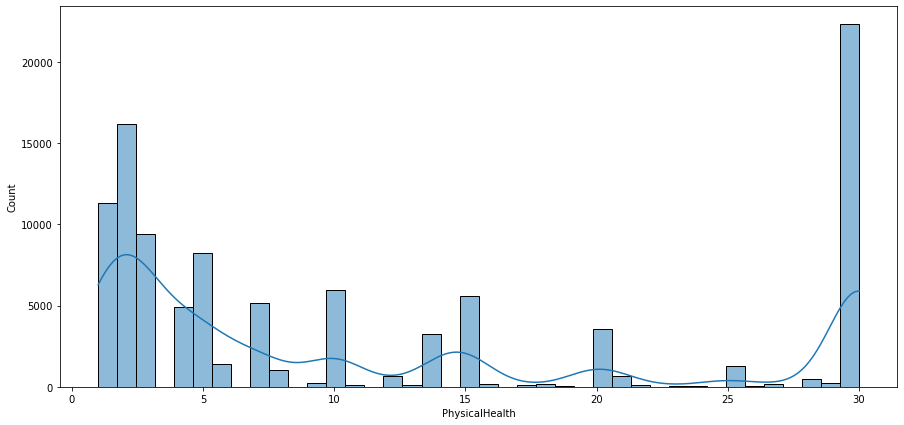

In [463]:
plt.rcParams['figure.figsize'] = [15,7]
sns.histplot(df.PhysicalHealth, bins = 40, kde = True)
plt.show()

In [464]:
df.PhysicalHealth.skew()

0.7266916167031741

PhysicalHealth is mildly positively skewed

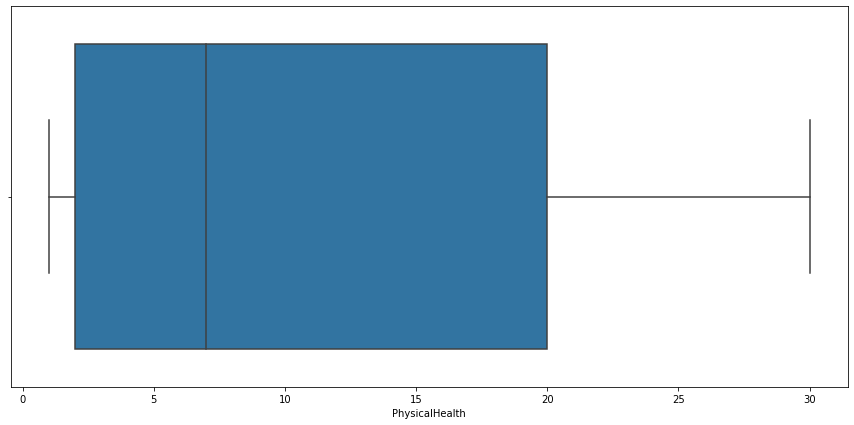

In [465]:
sns.boxplot(x = df.PhysicalHealth)
plt.show()

**Understanding the distribution of MentalHealth variable**

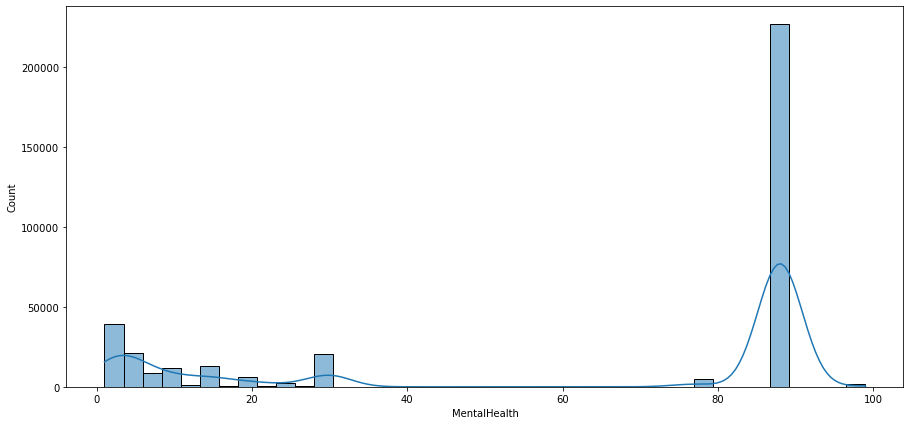

In [466]:
plt.rcParams['figure.figsize'] = [15,7]
sns.histplot(df.MentalHealth, bins = 40, kde = True)
plt.show()

In [467]:
df.MentalHealth.value_counts()

88.0    226439
30.0     19807
2.0      17730
5.0      15175
10.0     11393
3.0      11306
15.0     10853
1.0      10030
7.0       5979
20.0      5932
4.0       5781
77.0      4761
14.0      2251
25.0      2171
6.0       1652
99.0      1530
8.0       1194
12.0       832
28.0       580
21.0       395
29.0       350
18.0       232
9.0        227
16.0       168
27.0       148
17.0       145
13.0       124
22.0       109
11.0        96
24.0        78
23.0        74
26.0        68
19.0        23
Name: MentalHealth, dtype: int64

77, 88, 99 in the MentalHealth variable are missing values, So they are replace with np.NaN and treated accordingly

In [468]:
df.MentalHealth.replace([88, 77, 99], [np.NaN, np.NaN, np.NaN], inplace = True)

In [469]:
df.MentalHealth.value_counts()

30.0    19807
2.0     17730
5.0     15175
10.0    11393
3.0     11306
15.0    10853
1.0     10030
7.0      5979
20.0     5932
4.0      5781
14.0     2251
25.0     2171
6.0      1652
8.0      1194
12.0      832
28.0      580
21.0      395
29.0      350
18.0      232
9.0       227
16.0      168
27.0      148
17.0      145
13.0      124
22.0      109
11.0       96
24.0       78
23.0       74
26.0       68
19.0       23
Name: MentalHealth, dtype: int64

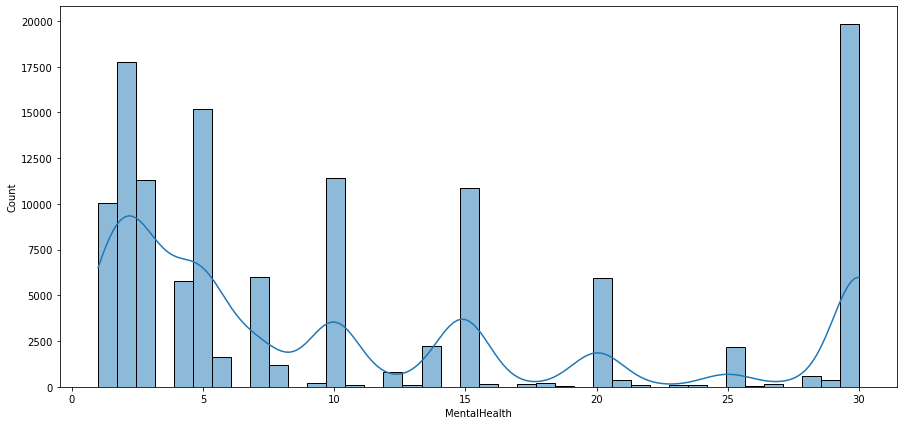

In [470]:
plt.rcParams['figure.figsize'] = [15,7]
sns.histplot(df.MentalHealth, bins = 40, kde = True)
plt.show()

In [471]:
df.MentalHealth.skew()

0.885766982226978

MentalHealth is mildly positively skewed

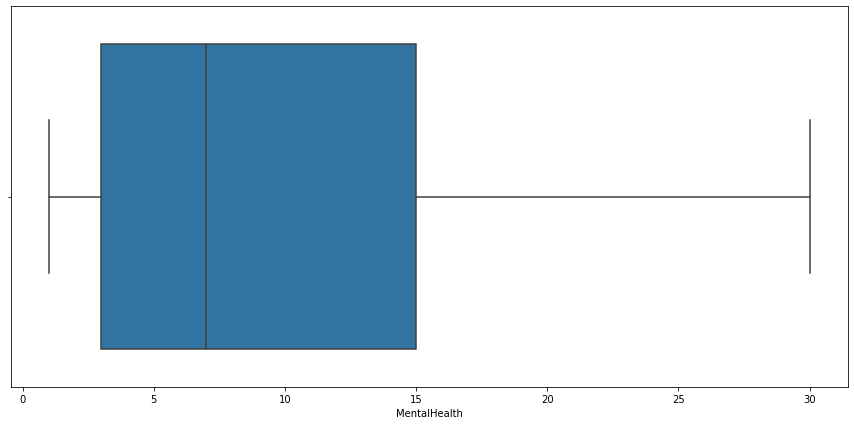

In [472]:
sns.boxplot(x = df.MentalHealth)
plt.show()

In [473]:
df.MentalHealth.isnull().sum()

232730

**Understanding the distribution of SleepTime variable**

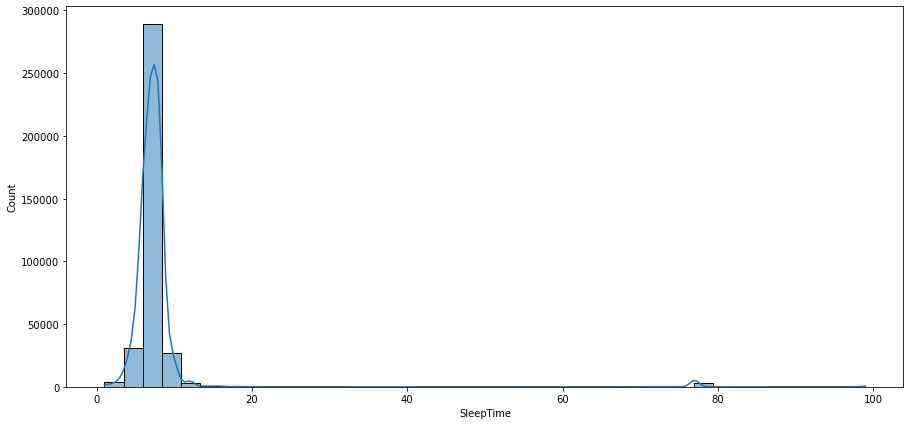

In [474]:
plt.rcParams['figure.figsize'] = [15,7]
sns.histplot(df.SleepTime, bins = 40, kde = True)
plt.show()

77, 99 in the SleepTime variable are missing values, So they are replace with np.NaN and treated accordingly

In [475]:
df.SleepTime.replace([77, 99], [np.NaN, np.NaN], inplace = True)

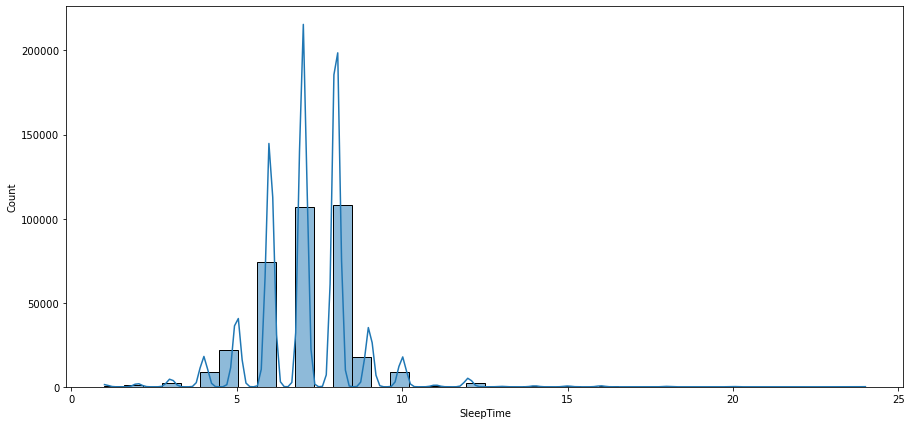

In [476]:
plt.rcParams['figure.figsize'] = [15,7]
sns.histplot(df.SleepTime, bins = 40, kde = True)
plt.show()

In [477]:
df.SleepTime.skew()

0.7037511528776128

SleepTime is mildly positively skewed

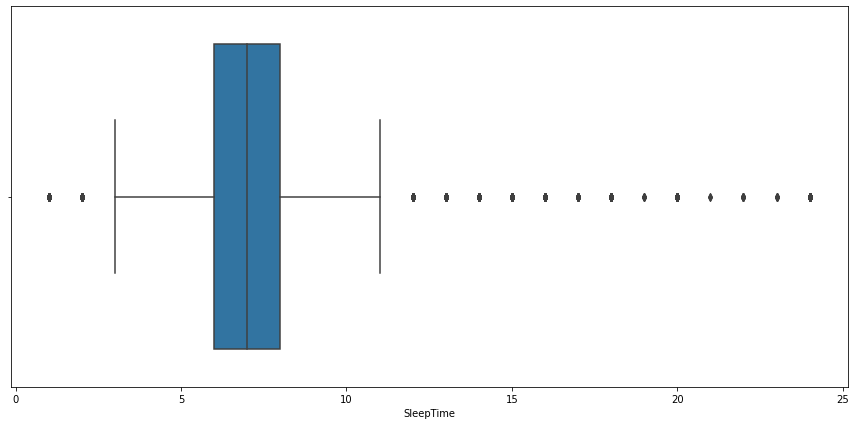

In [478]:
sns.boxplot(x = df.SleepTime)
plt.show()

There are outliers present in SleepTime Variable

In [479]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,357633.000000,102968.000000,124903.000000,354243.000000
mean,28.301703,11.792975,11.096371,7.094441
std,6.376030,11.132288,10.137365,1.457683
min,12.020000,1.000000,1.000000,1.000000
25%,23.990000,2.000000,3.000000,6.000000
50%,27.320000,7.000000,7.000000,7.000000
75%,31.380000,20.000000,15.000000,8.000000
max,98.430000,30.000000,30.000000,24.000000


In [480]:
df_categorical_variables = df.select_dtypes(include = 'object')

In [2]:
df=pd.read_csv('final.csv')

In [3]:
sns.pairplot(df, hue = 'HeartDisease')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000243DCAE1310> (for post_execute):


KeyboardInterrupt: 

In [482]:
df.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.084914,0.075461,-0.050016
PhysicalHealth,0.084914,1.000000,0.387251,-0.042878
MentalHealth,0.075461,0.387251,1.000000,-0.110157
SleepTime,-0.050016,-0.042878,-0.110157,1.000000


In [483]:
from pandas_profiling import ProfileReport

In [484]:
# ProfileReport(df)

In [5]:
 df=pd.read_csv('final.csv')

In [659]:
from warnings import filterwarnings
filterwarnings('ignore')

In [660]:
# a=pd.DataFrame(df.GenHealth.value_counts())
# a

In [662]:
# df['GenHealth'].value_counts().plot(kind='pie',figsize=(10,6),subplots=True,autopct='%0 f%%')
# plt.show()
# plt.savefig('genhealth.png', bbox_inches='tight')

In [667]:
pd.DataFrame(df['GenHealth'].value_counts())

,GenHealth
Very Good,124359
Good,103965
Excellent,72677
Fair,40045
Poor,13197


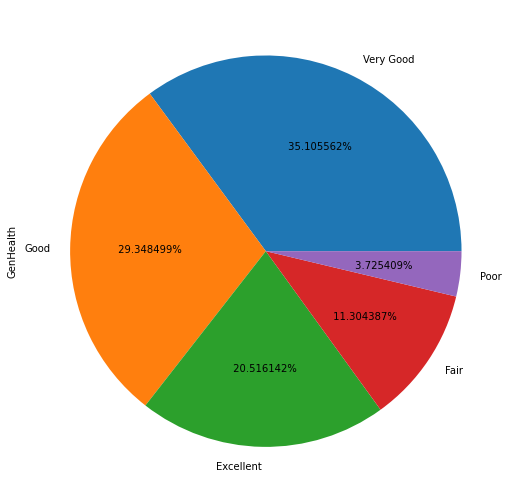

In [670]:
df['GenHealth'].value_counts().plot(kind='pie',figsize=(20,9),subplots=True,autopct='%0 f%%')
plt.show()


In [682]:
pd.DataFrame(df['HeartDisease'].value_counts())

,HeartDisease
No,323106
Yes,31137


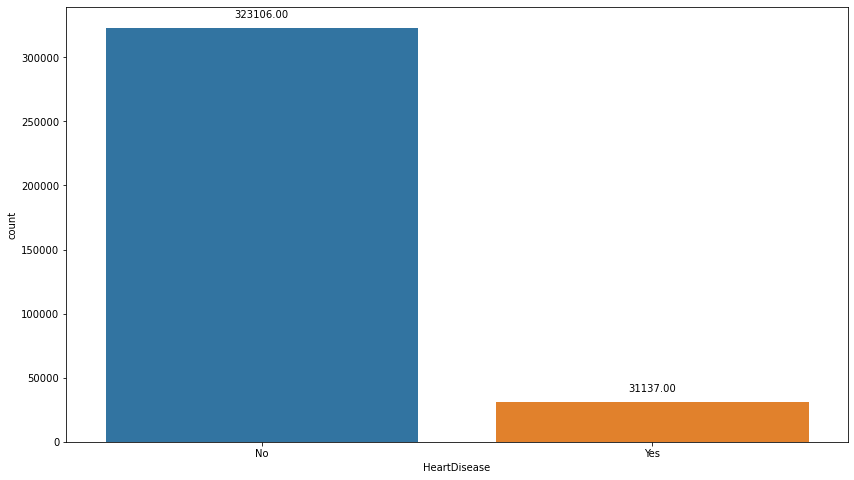

In [674]:
a=sns.countplot(df['HeartDisease'])
for p in a.patches: # Use for loop to annotate each bin of the plot
    a.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
            xytext = (0, 10), textcoords = 'offset points')
    
plt.savefig('hd.png', bbox_inches='tight')

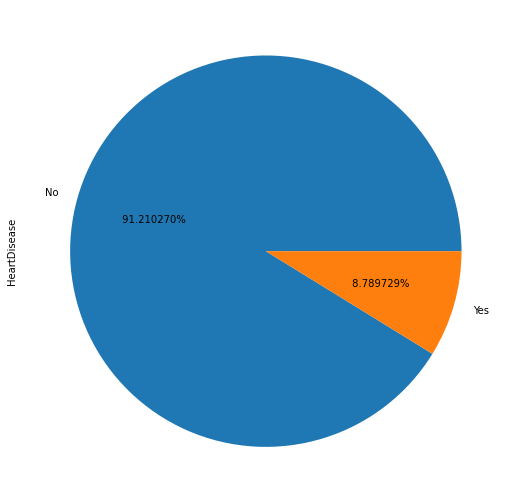

In [681]:
df['HeartDisease'].value_counts().plot(kind='pie',figsize=(20,9),subplots=True,autopct='%0 f%%')
plt.show()
plt.savefig('hd2.png', bbox_inches='tight')

In [677]:
pd.DataFrame(df['PhysicalActivity'].value_counts())

,PhysicalActivity
Yes,272936
No,81307


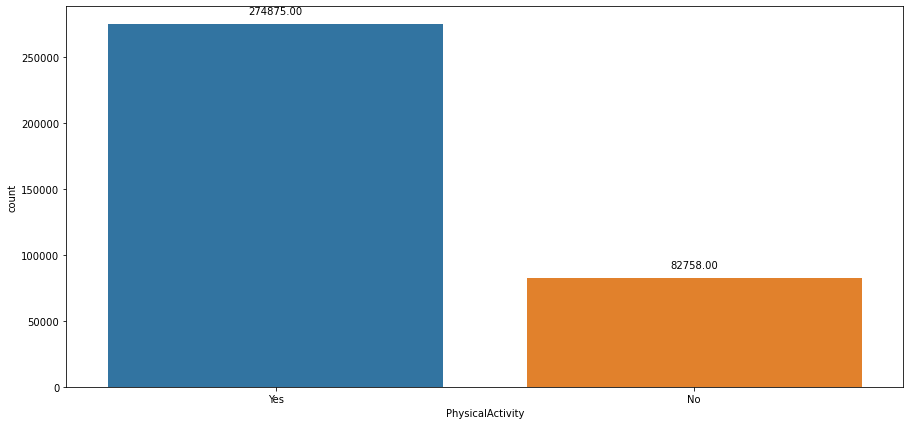

In [494]:
b=sns.countplot(df['PhysicalActivity'])
for p in b.patches: # Use for loop to annotate each bin of the plot
    b.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
            xytext = (0, 10), textcoords = 'offset points')
    
plt.savefig('pa1.png', bbox_inches='tight')

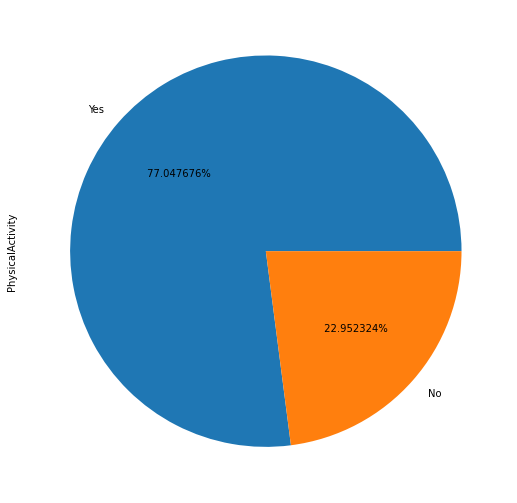

In [679]:
df['PhysicalActivity'].value_counts().plot(kind='pie',figsize=(20,9),subplots=True,autopct='%0 f%%')
plt.show()
plt.savefig('pa2', bbox_inches='tight')

In [687]:
pd.DataFrame((df['Race'].value_counts()/354243)*100)

,Race
White,76.477164
Hispanic,8.619225
Black,7.350604
Asian only,2.481912
Multiracial,2.105899
American Indian,1.676815
Other,0.774045
Hawaiian,0.514336


In [685]:
df.shape

(354243, 19)

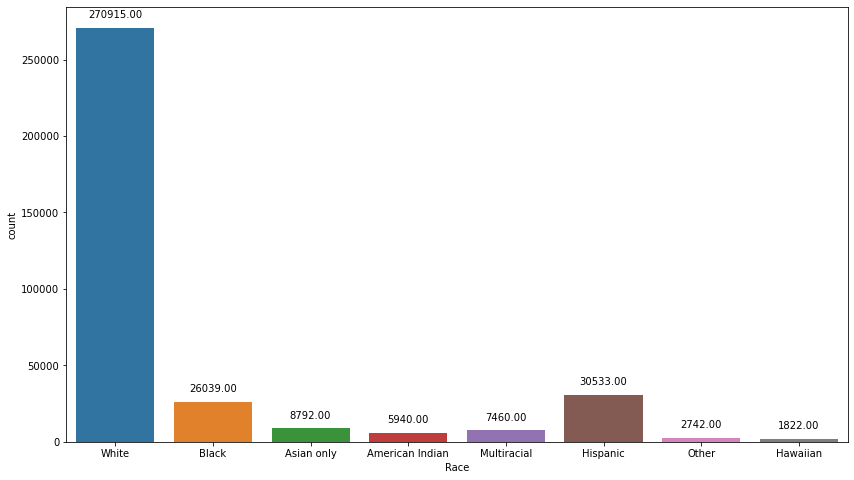

In [683]:
c=sns.countplot(df['Race'])
for p in c.patches: # Use for loop to annotate each bin of the plot
    c.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
            xytext = (0, 10), textcoords = 'offset points')
    
plt.savefig('race1.png', bbox_inches='tight')

In [498]:
# df['Race'].value_counts().plot(kind='pie',figsize=(10,6),subplots=True,autopct='%0 f%%',explode=[])
# plt.show()
# plt.savefig('race2.png', bbox_inches='tight')

In [693]:
(pd.DataFrame(df['AgeCategory'].value_counts()/354243)*100).transpose()

,65 to 69,60 to 64,70 to 74,55 to 59,80 plus,50 to 54,75 to 79,45 to 49,18 to 24,40 to 44,35 to 39,30 to 34,25 to 29
AgeCategory,11.614626,10.380445,9.628983,9.132714,7.855907,7.793238,6.749886,6.647979,6.478321,6.42892,6.312051,5.770897,5.206031


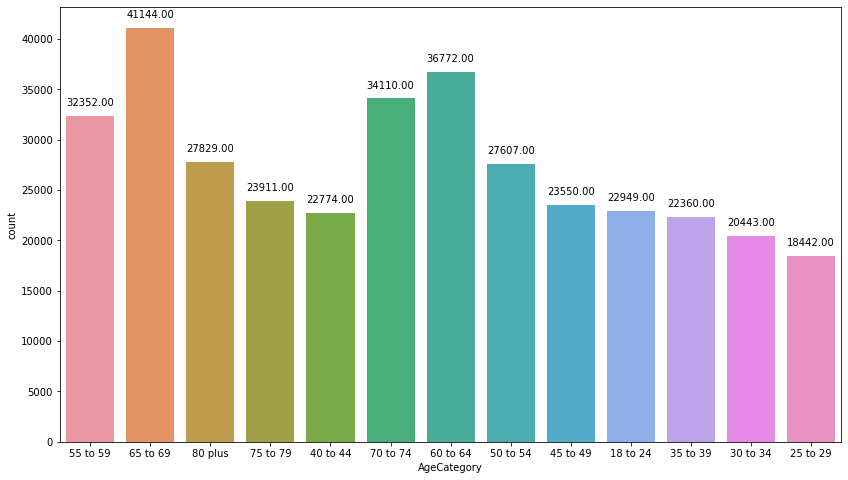

In [688]:
d=sns.countplot(df['AgeCategory'])
for p in d.patches: # Use for loop to annotate each bin of the plot
    d.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
            xytext = (0, 10), textcoords = 'offset points')
    

plt.savefig('AgeCategory.png', bbox_inches='tight')

In [698]:
pd.DataFrame(df['AlcoholDrinking'].value_counts().transpose())

,AlcoholDrinking
No,331491
Yes,22752


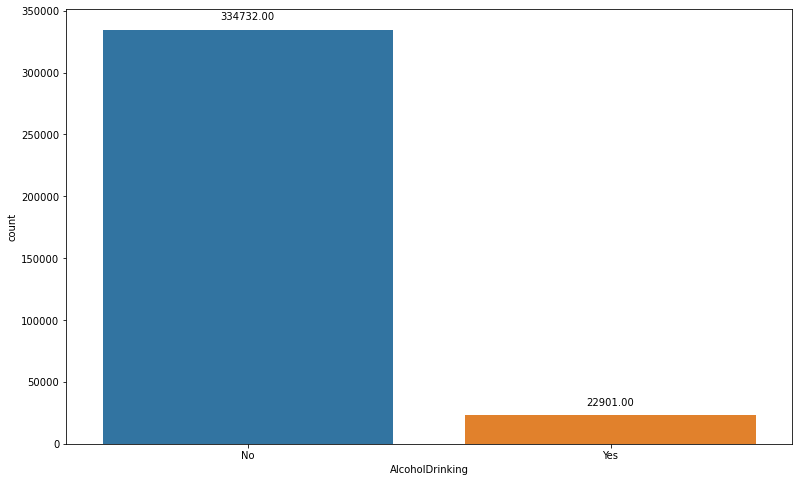

In [502]:
plt.figure(figsize=(13,8))

e=sns.countplot(df['AlcoholDrinking'])
for p in e.patches: # Use for loop to annotate each bin of the plot
    e.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
            xytext = (0, 10), textcoords = 'offset points')
plt.savefig('racealcho1.png', bbox_inches='tight')

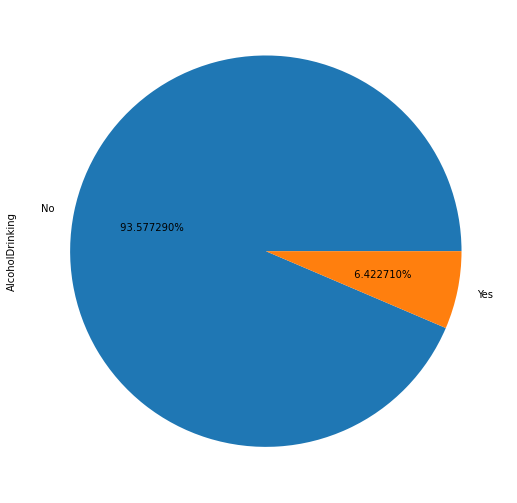

In [694]:
df['AlcoholDrinking'].value_counts().plot(kind='pie',figsize=(20,9),subplots=True,autopct='%0 f%%')
plt.show()
plt.savefig('alcho2.png', bbox_inches='tight')

In [504]:
df['Stroke'].value_counts()


No     343529
Yes     14104
Name: Stroke, dtype: int64

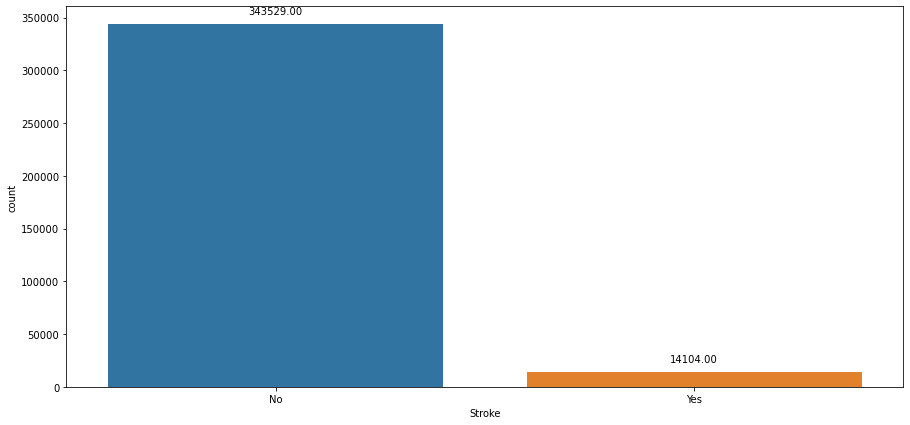

In [505]:
f=sns.countplot(df['Stroke'])
for p in f.patches: # Use for loop to annotate each bin of the plot
    f.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
            xytext = (0, 10), textcoords = 'offset points')
plt.savefig('stroke 1.png', bbox_inches='tight')    

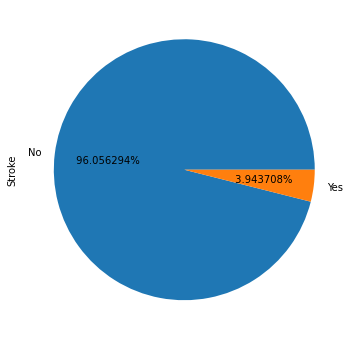

In [506]:
df['Stroke'].value_counts().plot(kind='pie',figsize=(10,6),subplots=True,autopct='%0 f%%')
plt.show()
plt.savefig('strroke2.png', bbox_inches='tight')

In [721]:
pd.DataFrame(df['Asthma'].value_counts())


,Asthma
Yes,306796
No,47447


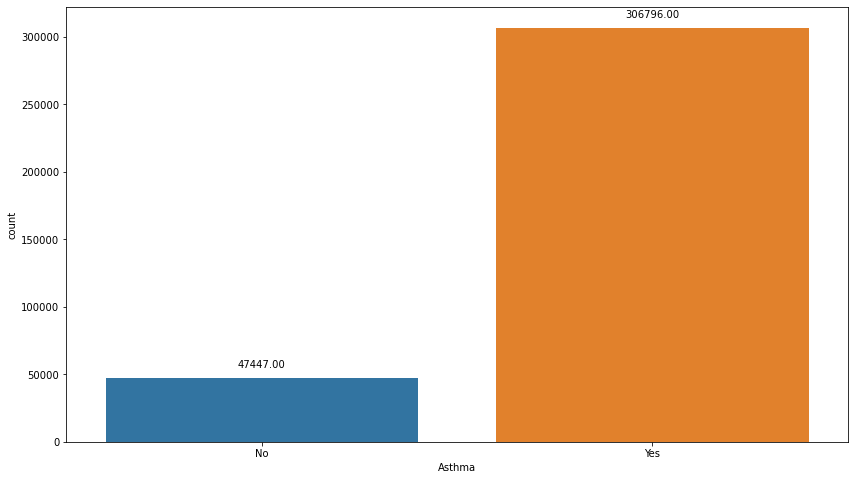

In [720]:
g=sns.countplot(df['Asthma'])
for p in g.patches: # Use for loop to annotate each bin of the plot
    g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
            xytext = (0, 10), textcoords = 'offset points')


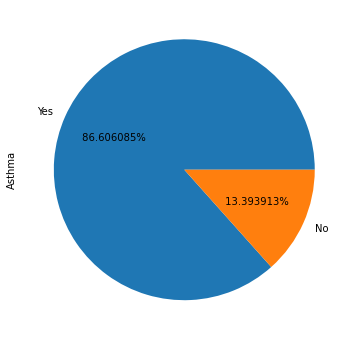

In [711]:
df['Asthma'].value_counts().plot(kind='pie',figsize=(10,6),subplots=True,autopct='%0 f%%')
plt.show()


In [722]:
pd.DataFrame(df['SkinCancer'].value_counts())


,SkinCancer
No,321282
Yes,32961


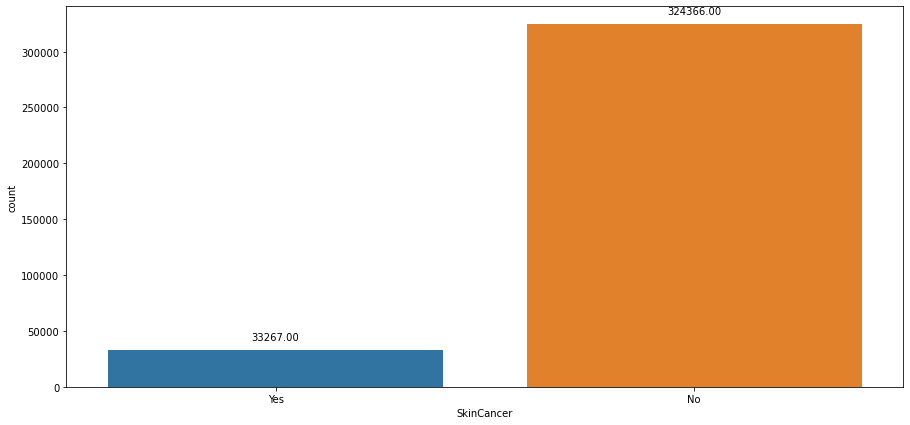

In [511]:
h=sns.countplot(df['SkinCancer'])
for p in h.patches: # Use for loop to annotate each bin of the plot
    h.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
            xytext = (0, 10), textcoords = 'offset points')
plt.savefig('sk1.png', bbox_inches='tight')    

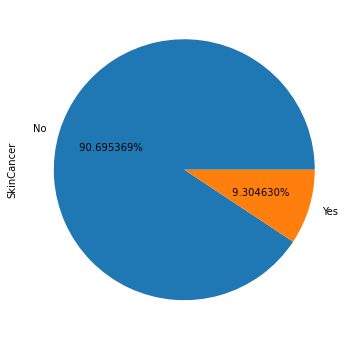

In [713]:
df['SkinCancer'].value_counts().plot(kind='pie',figsize=(10,6),subplots=True,autopct='%0 f%%')
plt.show()


In [724]:
pd.DataFrame(df['KidneyDisease'].value_counts())


,KidneyDisease
Yes,340133
No,14110


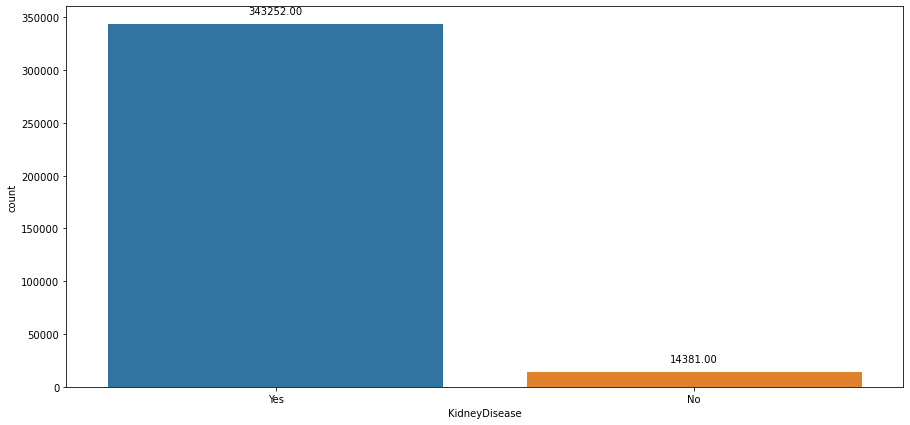

In [513]:
i=sns.countplot(df['KidneyDisease'])
plt.rcParams["figure.figsize"] = [14,8]
for p in i.patches: # Use for loop to annotate each bin of the plot
    i.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
            xytext = (0, 10), textcoords = 'offset points')
plt.savefig('kd1.png', bbox_inches='tight')    

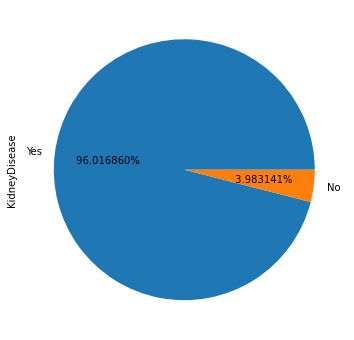

In [727]:
df['KidneyDisease'].value_counts().plot(kind='pie',figsize=(10,6),subplots=True,autopct='%0 f%%')
plt.show()


In [728]:
pd.DataFrame(df['Diabetic'].value_counts())


,Diabetic
No,305770
Yes,45655
During Pregnancy,2818


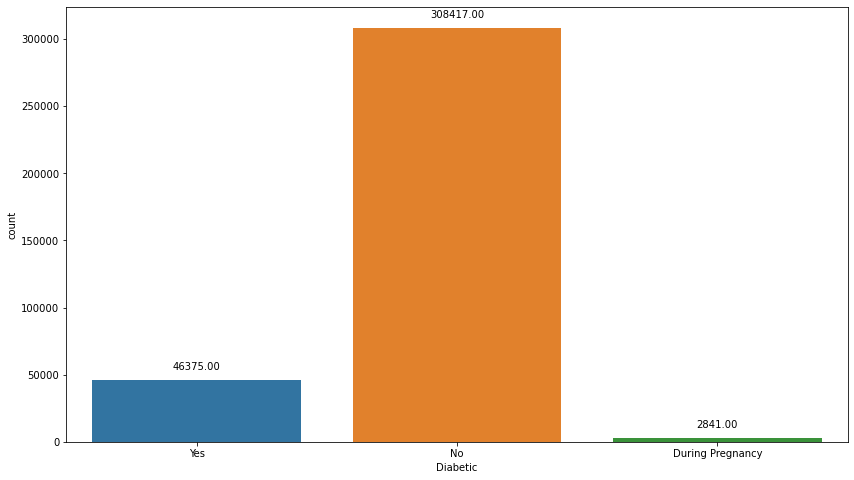

In [516]:
j=sns.countplot(df['Diabetic'])
for p in j.patches: # Use for loop to annotate each bin of the plot
    j.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
            xytext = (0, 10), textcoords = 'offset points')
plt.savefig('d1.png', bbox_inches='tight')     

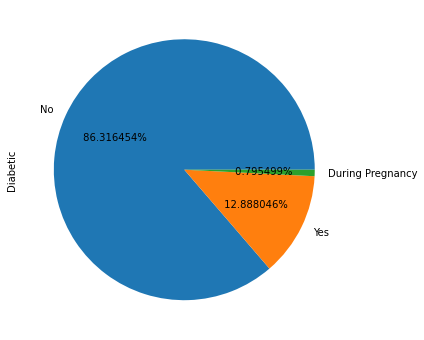

In [729]:
df['Diabetic'].value_counts().plot(kind='pie',figsize=(10,6),subplots=True,autopct='%0 f%%')
plt.show()


In [518]:
df['DiffWalking'].value_counts()


No     305777
Yes     51856
Name: DiffWalking, dtype: int64

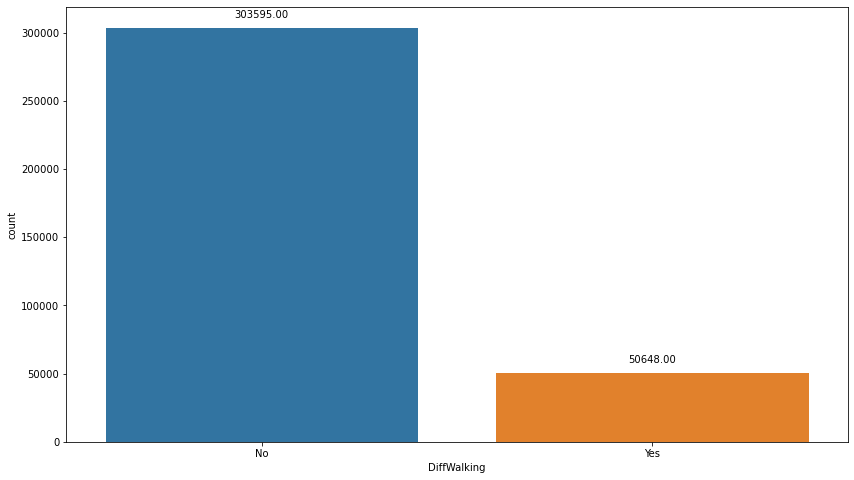

In [731]:
k=sns.countplot(df['DiffWalking'])
for p in k.patches: # Use for loop to annotate each bin of the plot
    k.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
            xytext = (0, 10), textcoords = 'offset points')
plt.savefig('df1.png', bbox_inches='tight')     

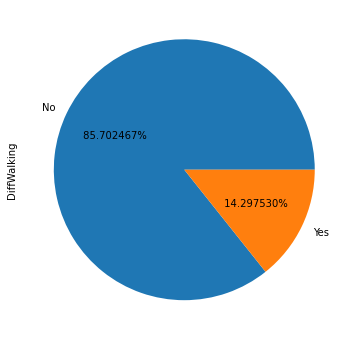

In [733]:
df['DiffWalking'].value_counts().plot(kind='pie',figsize=(10,6),subplots=True,autopct='%0 f%%')
plt.show()


In [739]:
pd.DataFrame(df['Smoking'].value_counts())


,Smoking
No,209591
Yes,144652


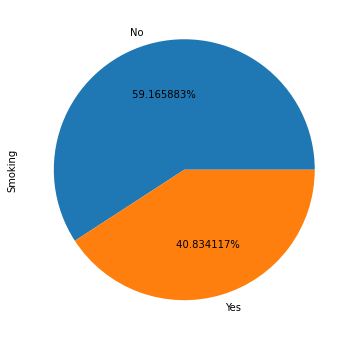

In [740]:
df['Smoking'].value_counts().plot(kind='pie',figsize=(10,6),subplots=True,autopct='%0 f%%')
plt.show()


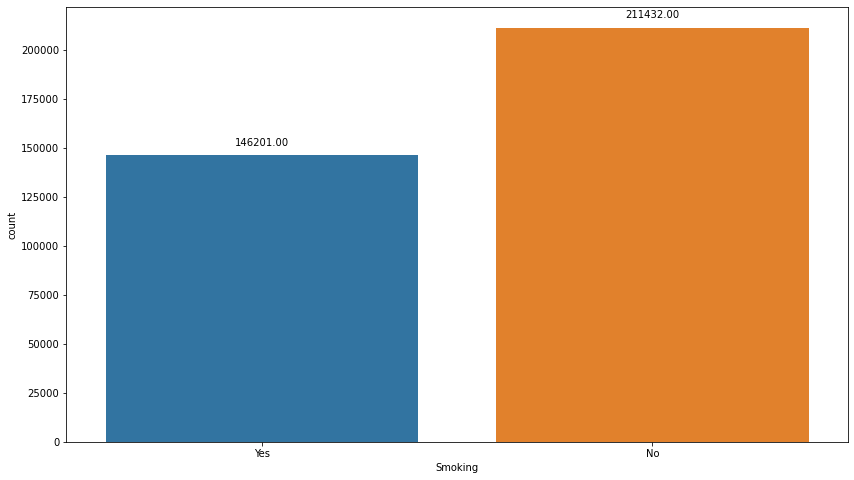

In [522]:
l=sns.countplot(df['Smoking'])
for p in l.patches: # Use for loop to annotate each bin of the plot
    l.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
            xytext = (0, 10), textcoords = 'offset points')
plt.savefig('smoke1.png', bbox_inches='tight')     

In [742]:
pd.DataFrame(df['Sex'].value_counts())


,Sex
Female,184886
Male,169357


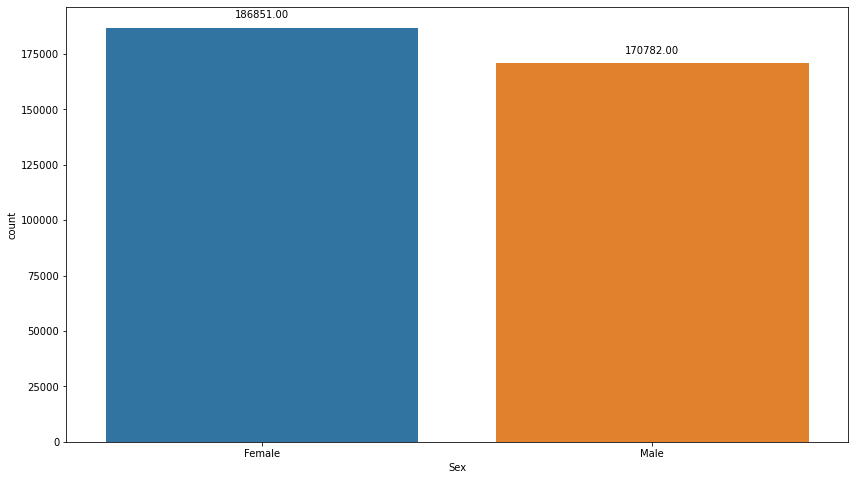

In [524]:
m=sns.countplot(df['Sex'])
for p in m.patches: # Use for loop to annotate each bin of the plot
    m.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
            xytext = (0, 10), textcoords = 'offset points')
plt.savefig('sx1.png', bbox_inches='tight')     

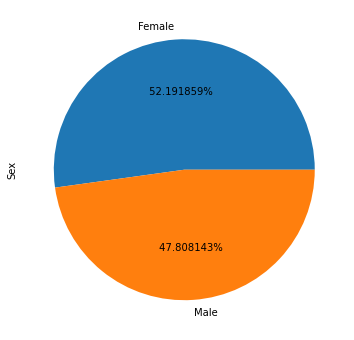

In [743]:
#Pie plots for the %data
df['Sex'].value_counts().plot(kind='pie',figsize=(10,6),subplots=True,autopct='%0 f%%')
plt.show()
 
# pd.crosstab(df1['race'],df1['income']).plot(kind='pie',subplots=True,figsize=(20,8),autopct='%0. f%%')

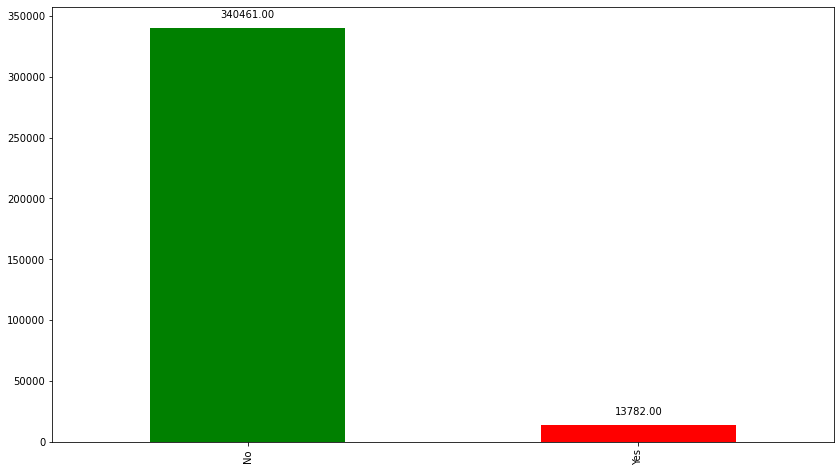

In [705]:
m=df['Stroke'].value_counts().plot(kind='bar',color=['g','r'])
for p in m.patches: # Use for loop to annotate each bin of the plot
    m.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
            xytext = (0, 10), textcoords = 'offset points')

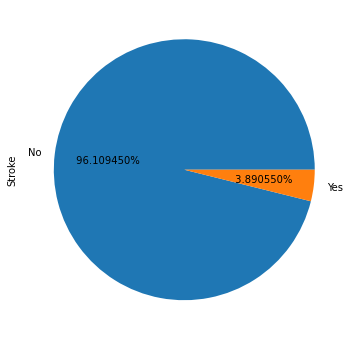

In [706]:
#Pie plots for the %data
df['Stroke'].value_counts().plot(kind='pie',figsize=(10,6),subplots=True,autopct='%0 f%%')
plt.show()

# pd.crosstab(df1['race'],df1['income']).plot(kind='pie',subplots=True,figsize=(20,8),autopct='%0. f%%')

In [744]:
df.GenHealth.value_counts()

Very Good    124359
Good         103965
Excellent     72677
Fair          40045
Poor          13197
Name: GenHealth, dtype: int64

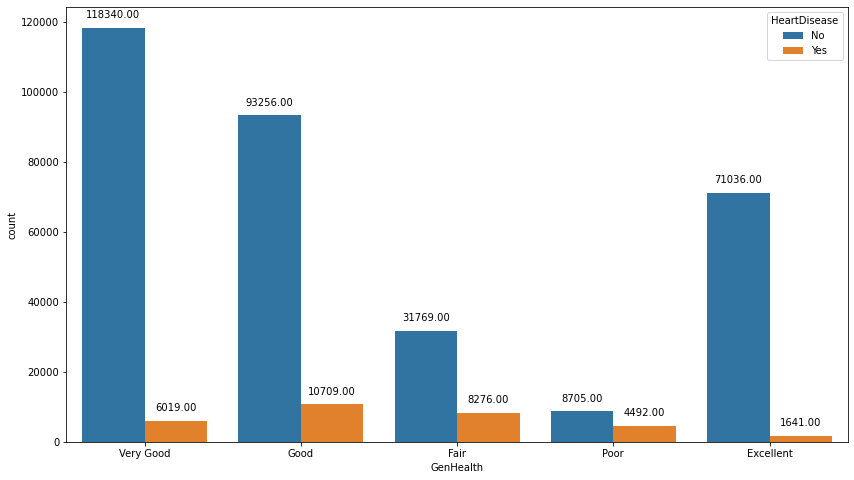

In [745]:
tt=sns.countplot(df['GenHealth'],hue=df['HeartDisease'])
for p in tt.patches: # Use for loop to annotate each bin of the plot
    tt.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
            xytext = (0, 10), textcoords = 'offset points')

In [528]:
df.columns

Index(['PhysicalActivity', 'HeartDisease', 'Race', 'AgeCategory', 'BMI',
       'AlcoholDrinking', 'PhysicalHealth', 'MentalHealth', 'SleepTime',
       'Stroke', 'Asthma', 'SkinCancer', 'KidneyDisease', 'Diabetic',
       'DiffWalking', 'Smoking', 'Sex', 'GenHealth'],
      dtype='object')

# Bivariate analysis

In [529]:
## Q vs Q
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357633 entries, 0 to 401957
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   PhysicalActivity  357633 non-null  object 
 1   HeartDisease      357633 non-null  object 
 2   Race              357633 non-null  object 
 3   AgeCategory       357633 non-null  object 
 4   BMI               357633 non-null  float64
 5   AlcoholDrinking   357633 non-null  object 
 6   PhysicalHealth    102968 non-null  float64
 7   MentalHealth      124903 non-null  float64
 8   SleepTime         354243 non-null  float64
 9   Stroke            357633 non-null  object 
 10  Asthma            357633 non-null  object 
 11  SkinCancer        357633 non-null  object 
 12  KidneyDisease     357633 non-null  object 
 13  Diabetic          357633 non-null  object 
 14  DiffWalking       357633 non-null  object 
 15  Smoking           357633 non-null  object 
 16  Sex               35

In [530]:
# sns.scatterplot(x=df['BMI'],y=df['PhysicalHealth'],hue=df['HeartDisease'])
# sns.scatterplot(x=df['BMI'],y=df['SleepTime'],hue=df['HeartDisease'])
# sns.scatterplot(x=df['BMI'],y=df['MentalHealth'],hue=df['HeartDisease'])
# sns.scatterplot(y=df['SleepTime'],x=df['MentalHealth'],hue=df['HeartDisease'])
# sns.scatterplot(y=df['SleepTime'],x=df['PhysicalHealth'],hue=df['HeartDisease'])
# sns.scatterplot(x=df['MentalHealth'],y=df['PhysicalHealth'],hue=df['HeartDisease'])
# sns.scatterplot(y=df['SleepTime'],x=df['PhysicalHealth'],hue=df['HeartDisease'])

In [531]:
# sns.scatterplot(x=df['BMI'],y=df['PhysicalHealth'],hue=df['Stroke'])
# sns.scatterplot(x=df['BMI'],y=df['SleepTime'],hue=df['Stroke'])
# sns.scatterplot(x=df['BMI'],y=df['MentalHealth'],hue=df['Stroke'])
# sns.scatterplot(y=df['SleepTime'],x=df['MentalHealth'],hue=df['Stroke'])
# sns.scatterplot(y=df['SleepTime'],x=df['PhysicalHealth'],hue=df['Stroke'])
# sns.scatterplot(x=df['MentalHealth'],y=df['PhysicalHealth'],hue=df['Stroke'])
# sns.scatterplot(y=df['SleepTime'],x=df['PhysicalHealth'],hue=df['Stroke'])

In [532]:
# sns.scatterplot(x=df['BMI'],y=df['PhysicalHealth'],hue=df['AgeCategory'])
# sns.scatterplot(x=df['BMI'],y=df['SleepTime'],hue=df['AgeCategory'])
# sns.scatterplot(x=df['BMI'],y=df['MentalHealth'],hue=df['AgeCategory'])
# sns.scatterplot(y=df['SleepTime'],x=df['MentalHealth'],hue=df['AgeCategory'])
# sns.scatterplot(y=df['SleepTime'],x=df['PhysicalHealth'],hue=df['AgeCategory'])
# sns.scatterplot(x=df['MentalHealth'],y=df['PhysicalHealth'],hue=df['AgeCategory'])
# sns.scatterplot(y=df['SleepTime'],x=df['PhysicalHealth'],hue=df['AgeCategory'])

<AxesSubplot:xlabel='BMI', ylabel='SleepTime'>

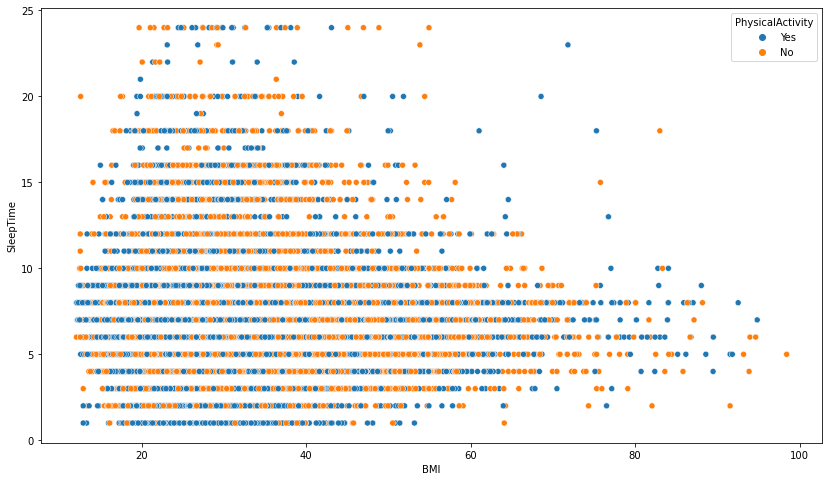

In [533]:
sns.scatterplot(y=df['SleepTime'],x=df['BMI'],hue=df["PhysicalActivity"])

<AxesSubplot:>

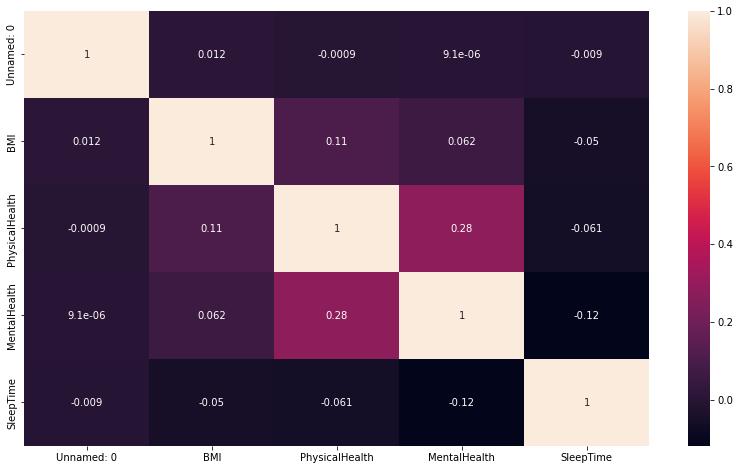

In [802]:
sns.heatmap(df.corr(),annot=True)

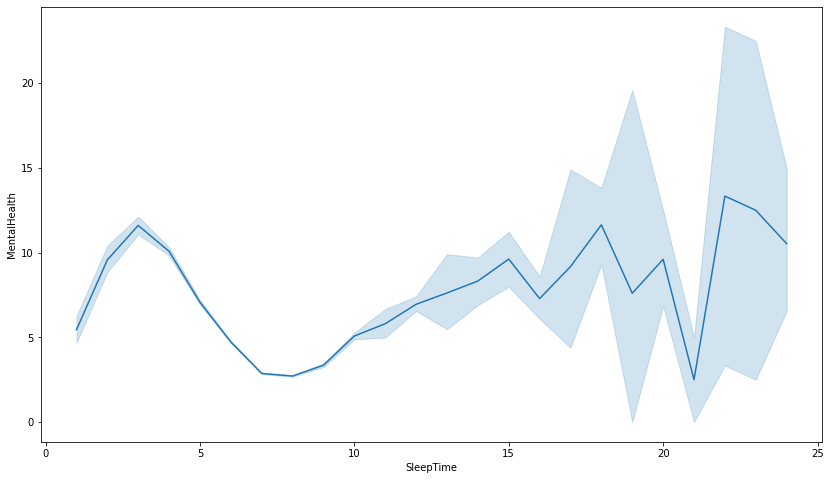

In [753]:
#sns.lineplot(y=df['MentalHealth'],x=df['SleepTime'],hue=df['Stroke'])
sns.lineplot(y=df['MentalHealth'],x=df['SleepTime'])
plt.show()

<AxesSubplot:xlabel='SleepTime', ylabel='PhysicalHealth'>

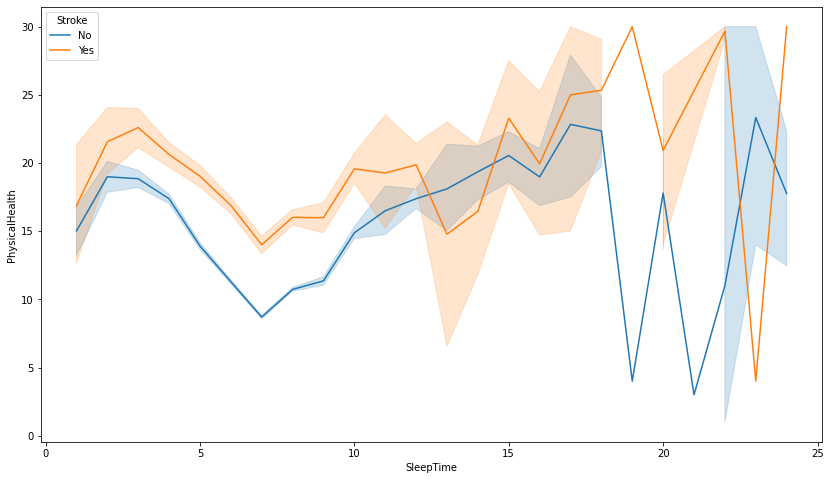

In [536]:
    sns.lineplot(y=df['PhysicalHealth'],x=df['SleepTime'],hue=df['Stroke'])

In [774]:
# # #barplot
# # plt.figure(figsize=(20,8))
# # pd.crosstab(df['HeartDisease'],df['Stroke']).plot(kind='pie',subplots=True,figsize=(20,8),autopct='%0. f%%')
# #barplot

# pd.crosstab(df['HeartDisease'],df['Stroke']).plot(kind='bar',subplots=True,autopct='%0 f%%')
# plt.ylabel('Heart')
# plt.xlabel('stroke')

<AxesSubplot:xlabel='PhysicalHealth', ylabel='MentalHealth'>

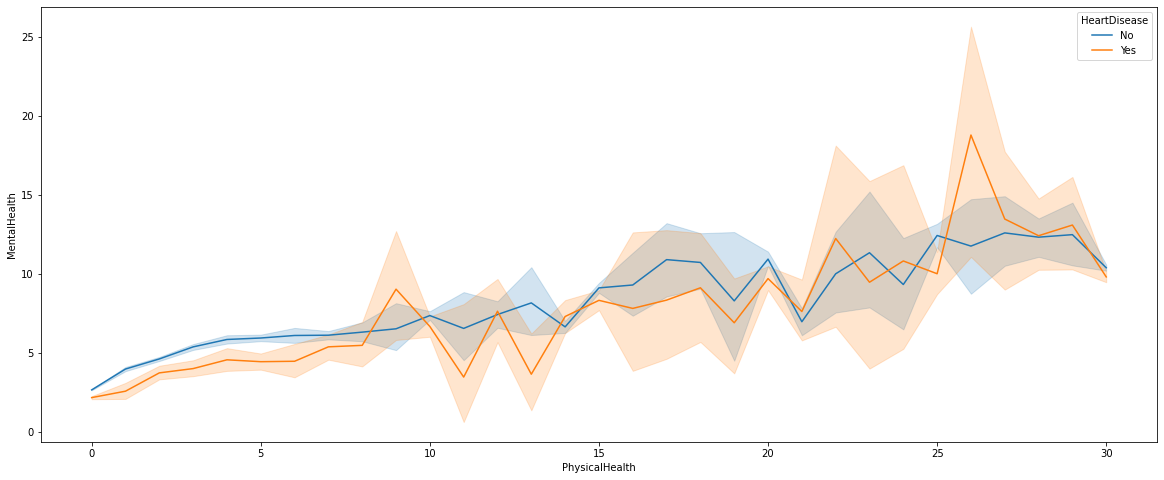

In [9]:
plt.figure(figsize=(20,8))
sns.lineplot(y=df['MentalHealth'],x=df['PhysicalHealth'],hue=df['HeartDisease'])

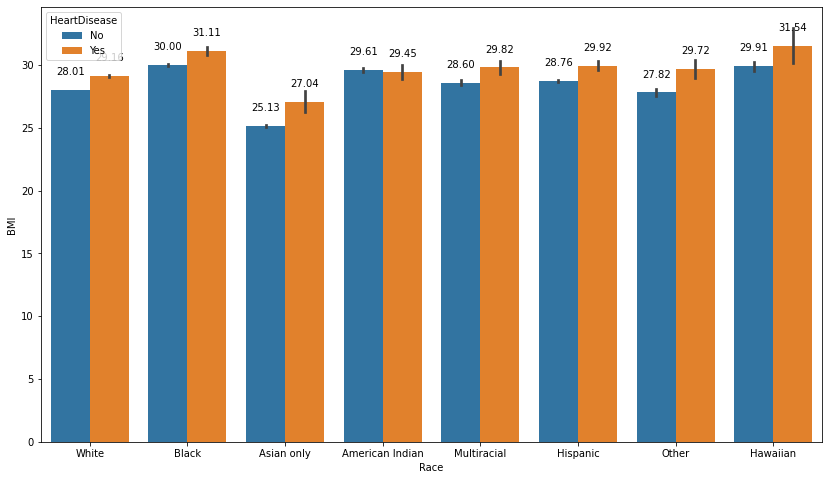

In [538]:
#Q &C
ax=sns.barplot(y=df['BMI'],x=df['Race'],hue=df['HeartDisease']) 
for p in ax.patches: # use for loop to annotate each bin of the plot
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 15), textcoords = 'offset points')

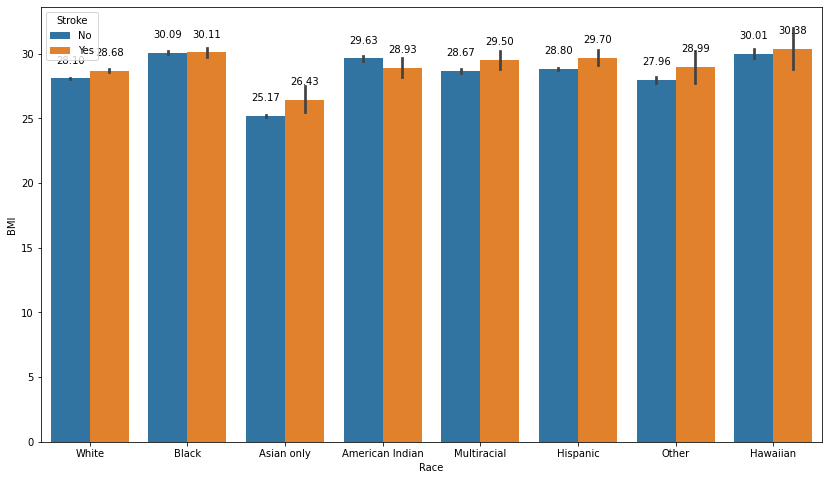

In [539]:
#Q &C
ax=sns.barplot(y=df['BMI'],x=df['Race'],hue=df['Stroke']) 
for p in ax.patches: # use for loop to annotate each bin of the plot
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 15), textcoords = 'offset points')

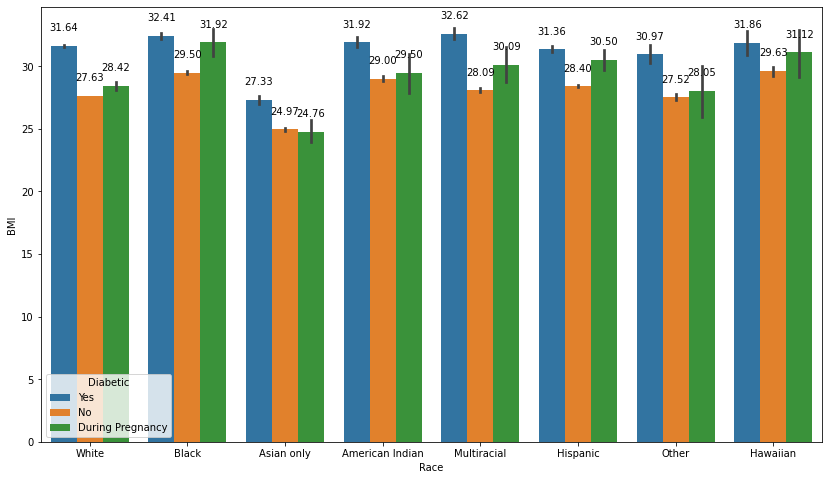

In [540]:
#Q &C
ax=sns.barplot(y=df['BMI'],x=df['Race'],hue=df['Diabetic'])
plt.width=4
for p in ax.patches: # use for loop to annotate each bin of the plot
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 15), textcoords = 'offset points')

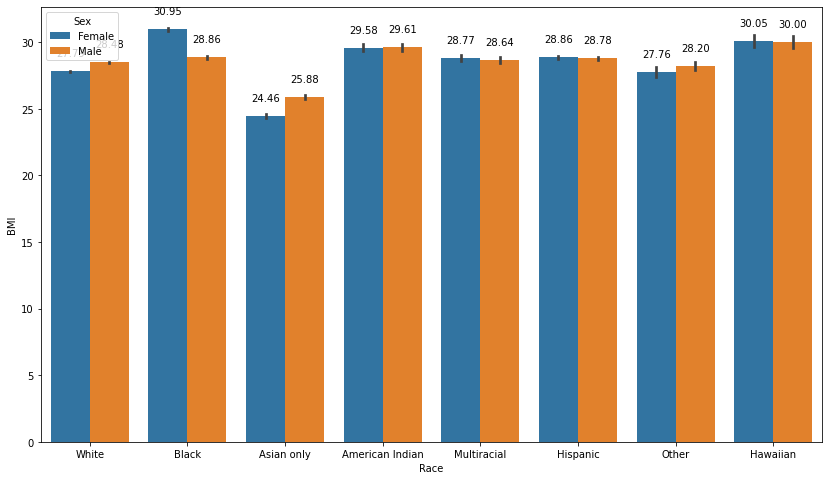

In [541]:
#Q &C
ax=sns.barplot(y=df['BMI'],x=df['Race'],hue=df['Sex']) 
for p in ax.patches: # use for loop to annotate each bin of the plot
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 15), textcoords = 'offset points')

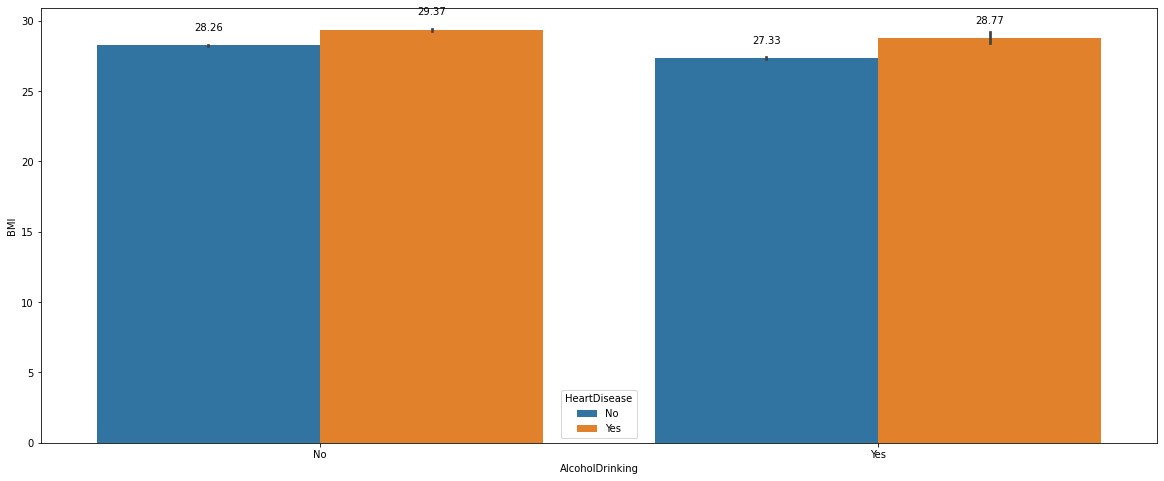

In [12]:
#Q &C
plt.figure(figsize=(20,8))
ax=sns.barplot(y=df['BMI'],x=df['AlcoholDrinking'],hue=df['HeartDisease']) 
for p in ax.patches: # use for loop to annotate each bin of the plot
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 15), textcoords = 'offset points')

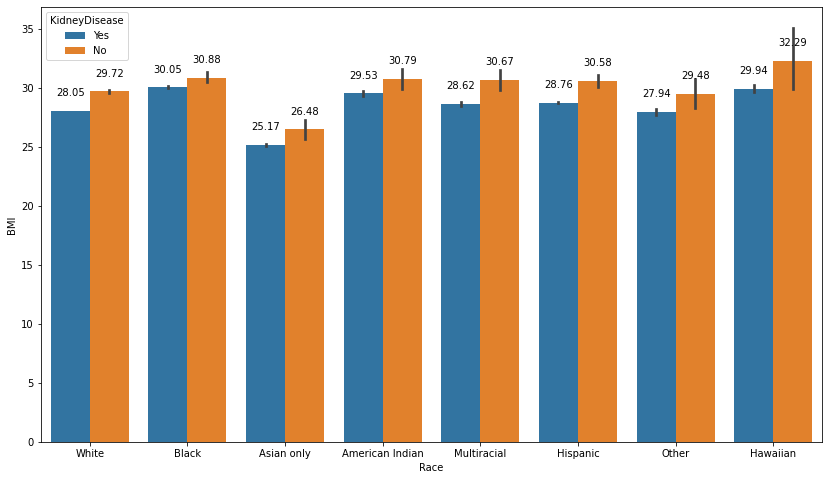

In [543]:
#Q &C
ax=sns.barplot(y=df['BMI'],x=df['Race'],hue=df['KidneyDisease']) 
for p in ax.patches: # use for loop to annotate each bin of the plot
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 15), textcoords = 'offset points')

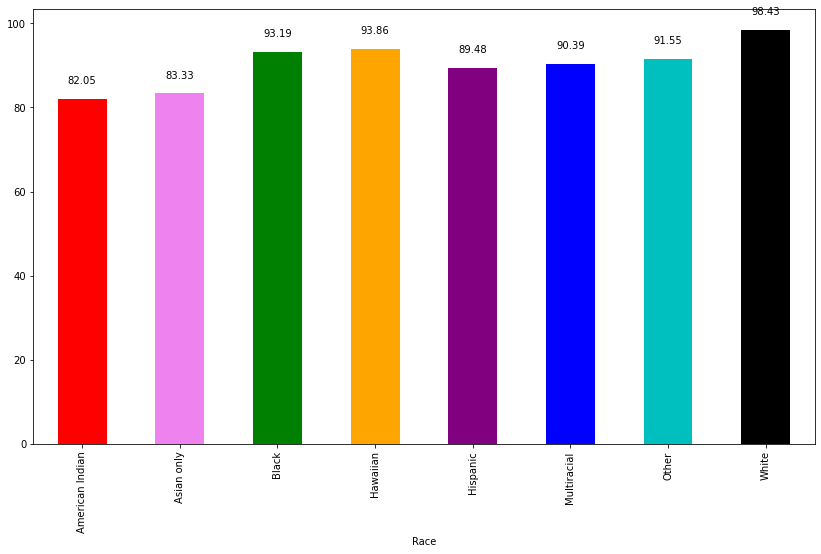

In [544]:
#to get maximum BMI record in different races
ax=df.groupby('Race')['BMI'].max().plot(kind='bar',color=['r','violet','g','orange','purple','b','c','k'])
for p in ax.patches: # use for loop to annotate each bin of the plot
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 15), textcoords = 'offset points')

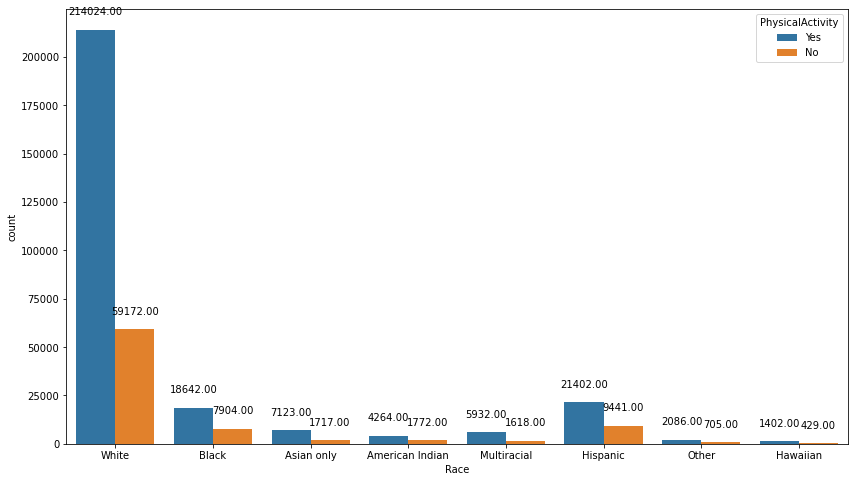

In [545]:
#Q &C
ax=sns.countplot(df['Race'],hue=df['PhysicalActivity']) 
for p in ax.patches: # use for loop to annotate each bin of the plot
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 15), textcoords = 'offset points')

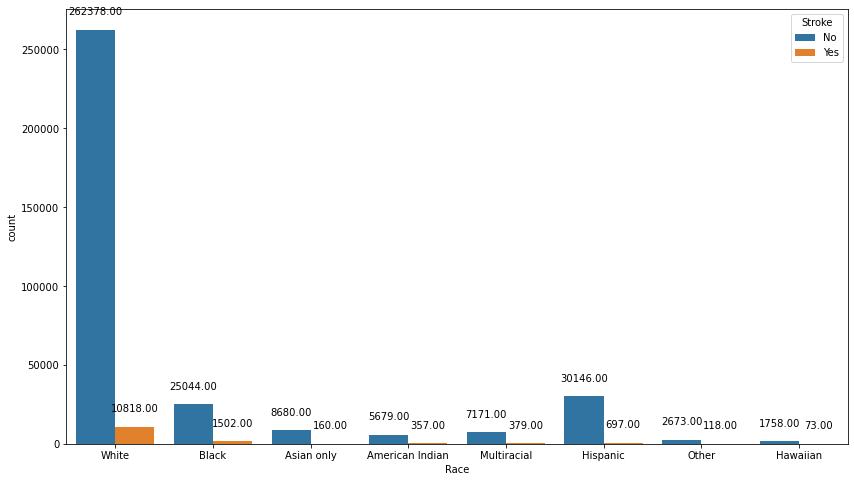

In [546]:
#Q &C
ax=sns.countplot(df['Race'],hue=df['Stroke']) 
for p in ax.patches: # use for loop to annotate each bin of the plot
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 15), textcoords = 'offset points')

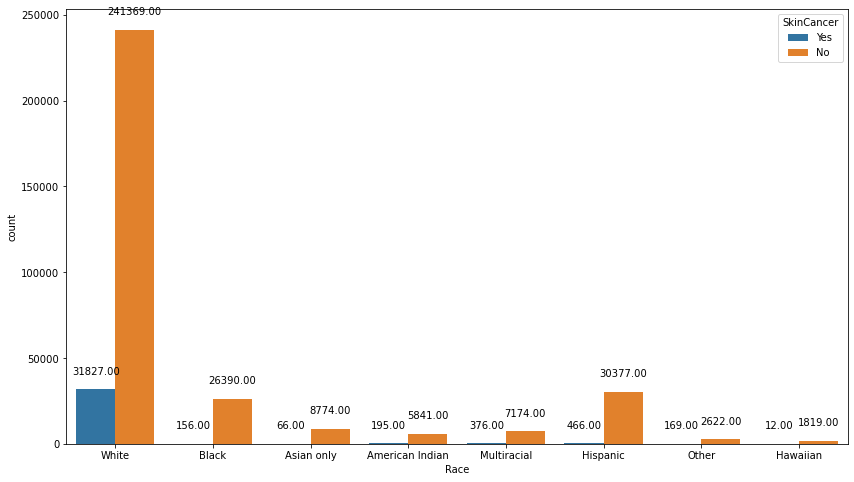

In [547]:
#Q &C
ax=sns.countplot(df['Race'],hue=df['SkinCancer']) 
for p in ax.patches: # use for loop to annotate each bin of the plot
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 15), textcoords = 'offset points')

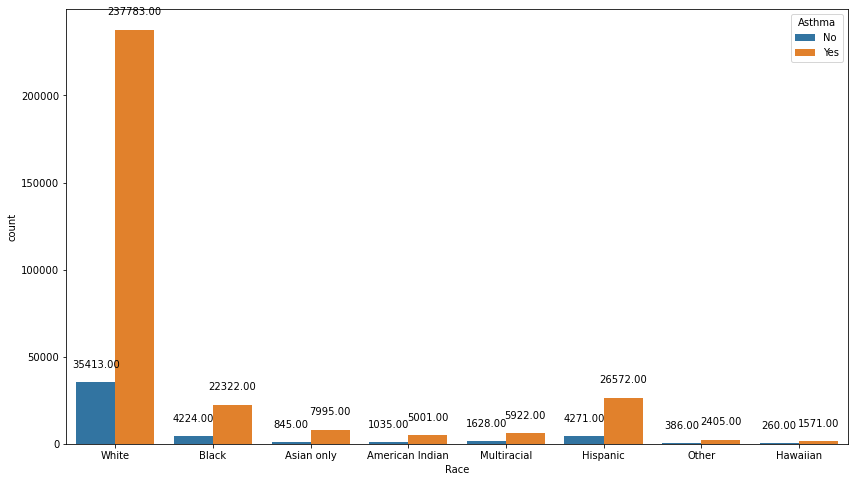

In [548]:
#Q &C
ax=sns.countplot(df['Race'],hue=df['Asthma']) 
for p in ax.patches: # use for loop to annotate each bin of the plot
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 15), textcoords = 'offset points')

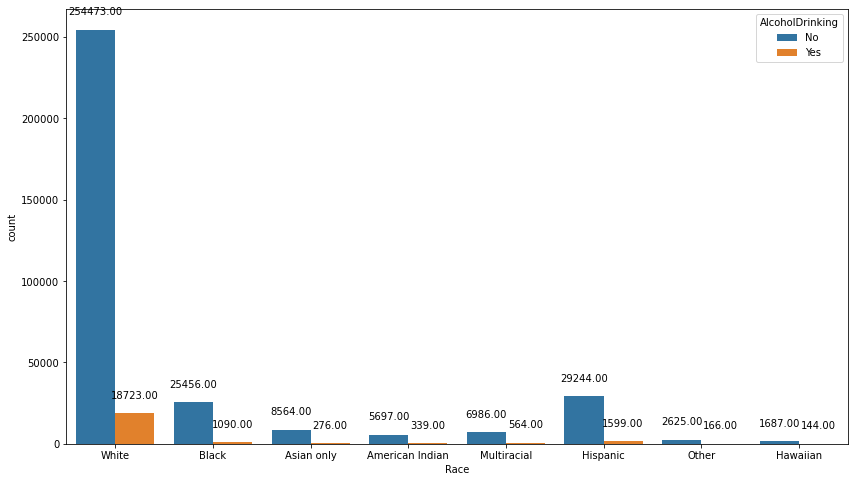

In [549]:
#Q &C
ax=sns.countplot(df['Race'],hue=df['AlcoholDrinking']) 
for p in ax.patches: # use for loop to annotate each bin of the plot
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 15), textcoords = 'offset points')

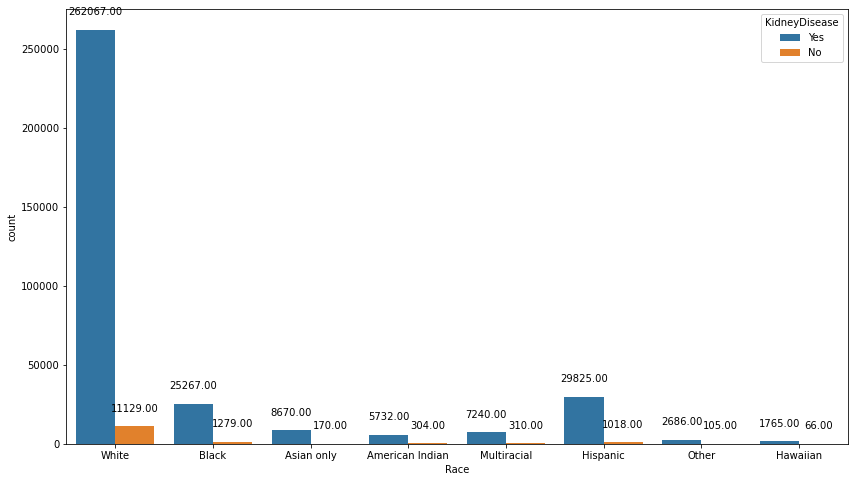

In [550]:
#Q &C
ax=sns.countplot(df['Race'],hue=df['KidneyDisease']) 
for p in ax.patches: # use for loop to annotate each bin of the plot
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 15), textcoords = 'offset points')

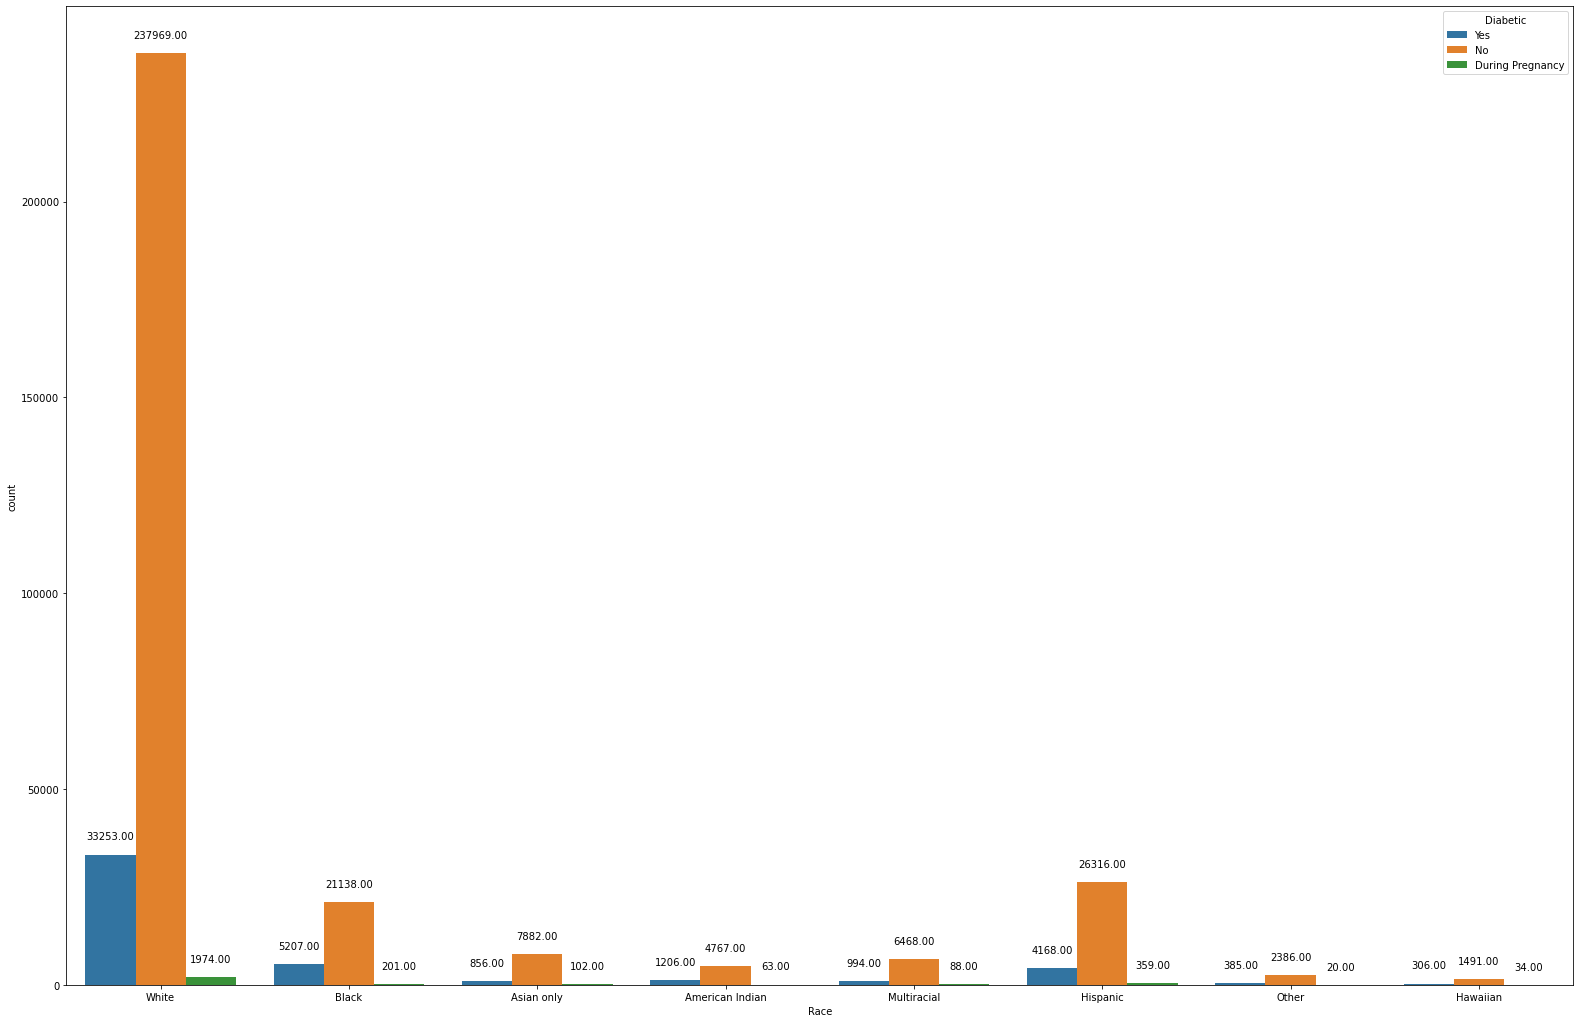

In [551]:
#Q &C
plt.figure(figsize=(27,18))
ax=sns.countplot(df['Race'],hue=df['Diabetic']) 
for p in ax.patches: # use for loop to annotate each bin of the plot
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 15), textcoords = 'offset points')

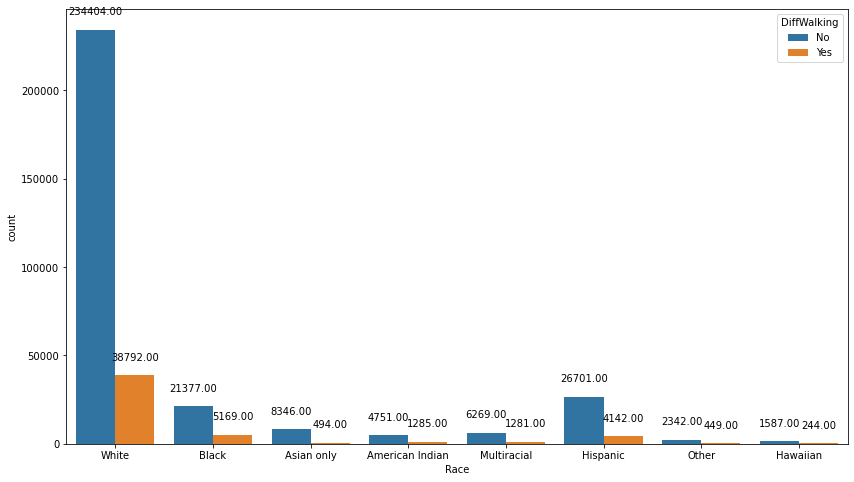

In [552]:
#Q &C
ax=sns.countplot(df['Race'],hue=df['DiffWalking']) 
for p in ax.patches: # use for loop to annotate each bin of the plot
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 15), textcoords = 'offset points')

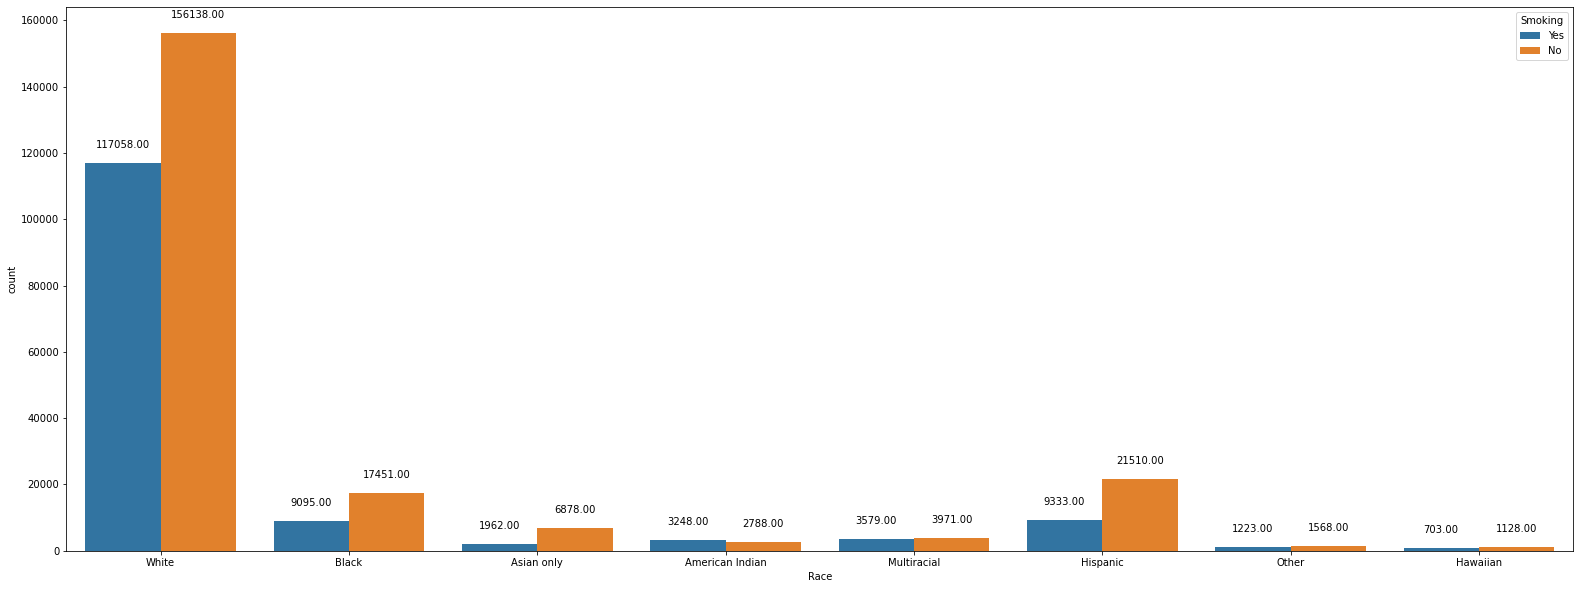

In [553]:
#Q &C
plt.figure(figsize=(27,10))
ax=sns.countplot(df['Race'],hue=df['Smoking']) 
for p in ax.patches: # use for loop to annotate each bin of the plot
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 15), textcoords = 'offset points')

<AxesSubplot:xlabel='Race', ylabel='BMI'>

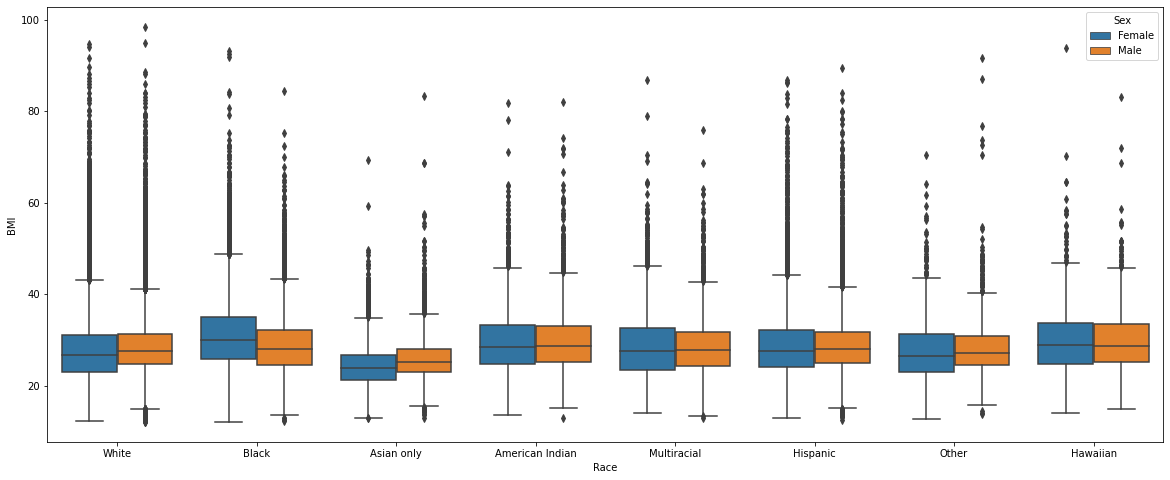

In [6]:
plt.figure(figsize=(20,8))
sns.boxplot(y=df['BMI'],x=df['Race'],hue=df['Sex'])

<AxesSubplot:xlabel='AgeCategory', ylabel='SleepTime'>

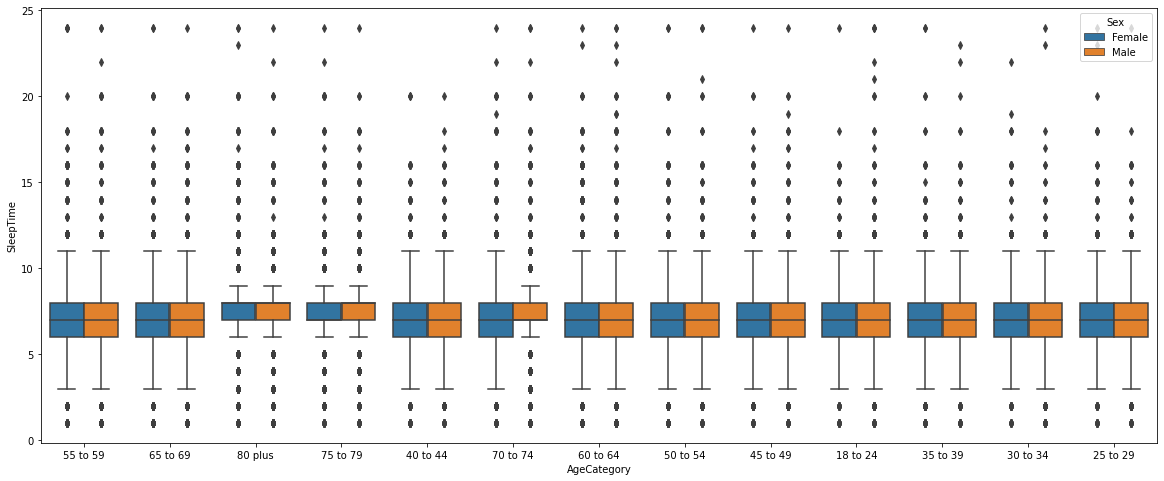

In [782]:
plt.figure(figsize=(20,8))

sns.boxplot(x=df['AgeCategory'],y=df['SleepTime'],hue=df['Sex'])

<AxesSubplot:xlabel='AgeCategory', ylabel='SleepTime'>

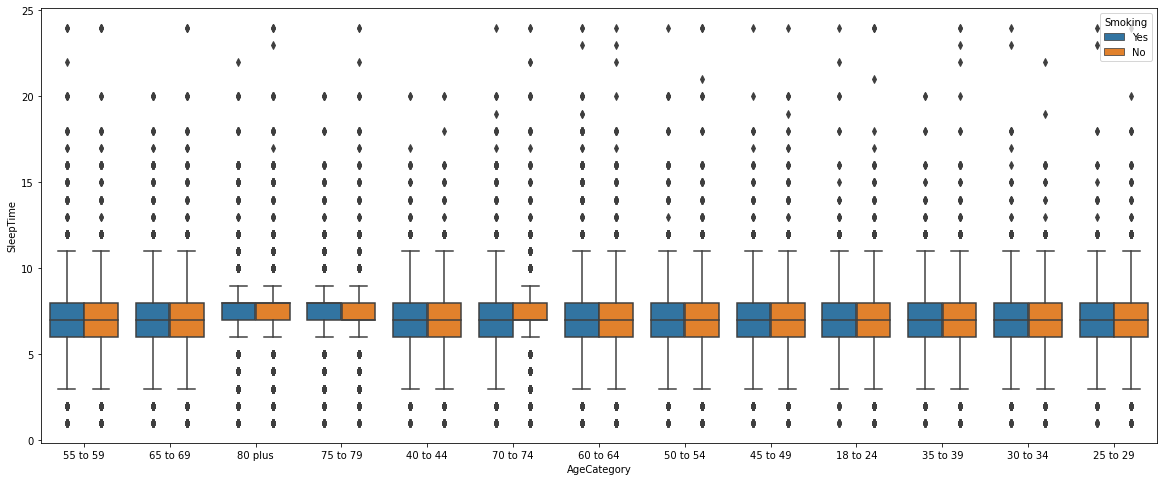

In [783]:
plt.figure(figsize=(20,8))

sns.boxplot(x=df['AgeCategory'],y=df['SleepTime'],hue=df['Smoking'])

<AxesSubplot:xlabel='Race', ylabel='BMI'>

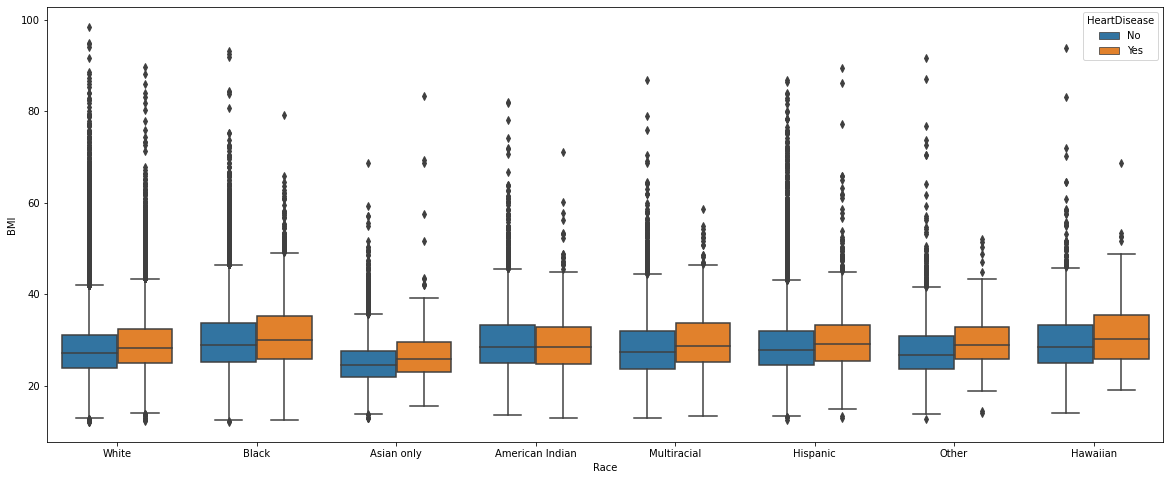

In [7]:
plt.figure(figsize=(20,8))
sns.boxplot(y=df['BMI'],x=df['Race'],hue=df['HeartDisease'])

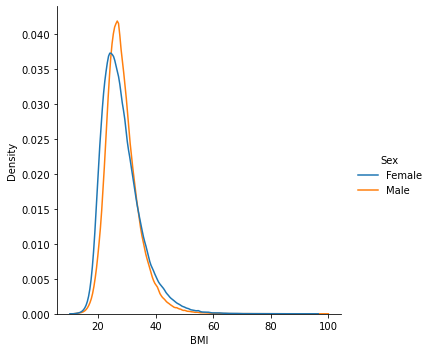

In [788]:
hours_vs_income=df[['BMI','Sex']]
sns.displot(x=df['BMI'],hue='Sex',data=df,kind='kde')
plt.show()

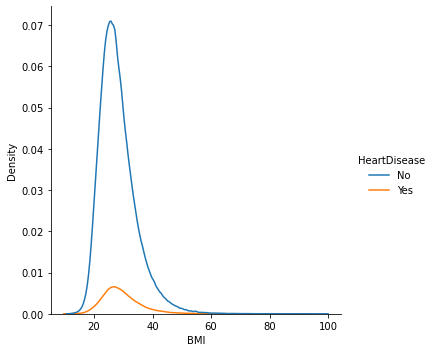

In [789]:

sns.displot(x=df['BMI'],hue=df['HeartDisease'],data=df,kind='kde')
plt.show()

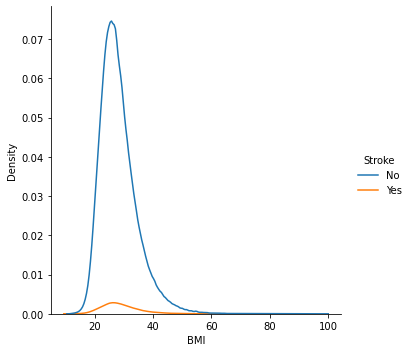

In [790]:

sns.displot(x=df['BMI'],hue=df['Stroke'],data=df,kind='kde')
plt.show()

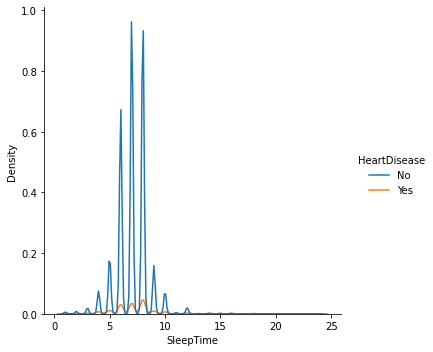

In [791]:

sns.displot(x=df['SleepTime'],hue=df['HeartDisease'],data=df,kind='kde')
plt.show()

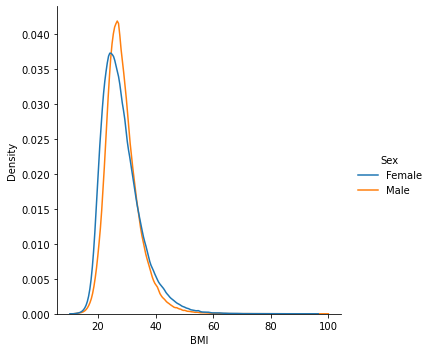

In [792]:

sns.displot(x=df[''],hue=df['Sex'],data=df,kind='kde')
plt.show()

<AxesSubplot:xlabel='BMI', ylabel='AlcoholDrinking'>

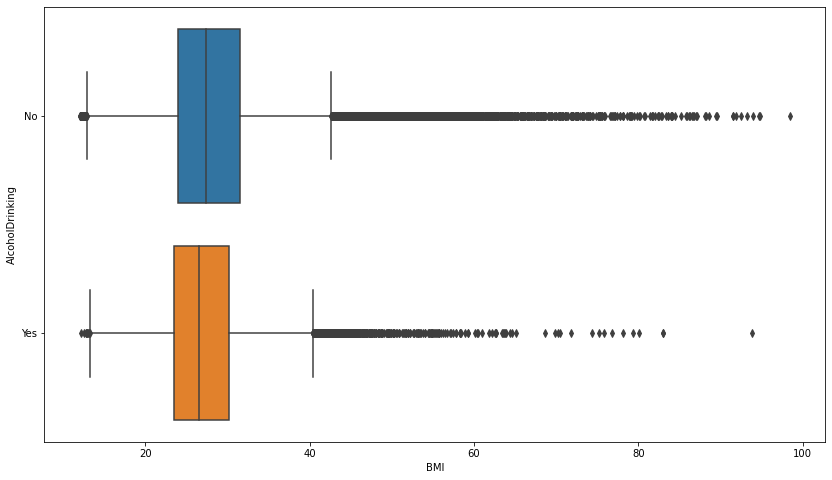

In [801]:
sns.boxplot(x=df['BMI'],y=df['AlcoholDrinking'])

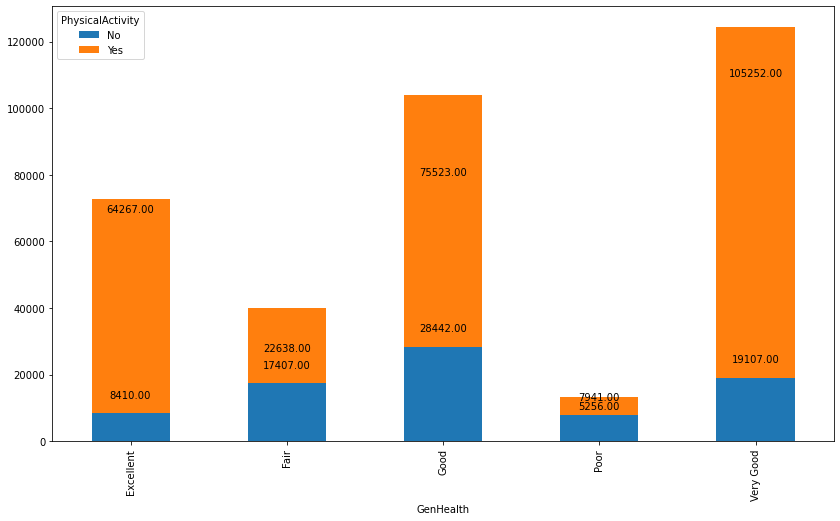

In [806]:
tt=pd.crosstab(df['GenHealth'],df['PhysicalActivity']).plot.bar(stacked=True)
for p in tt.patches: # use for loop to annotate each bin of the plot
    tt.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 15), textcoords = 'offset points')

In [810]:
pd.crosstab(df1['GenHealth'],df1['PhysicalActivity'])

PhysicalActivity,No,Yes
GenHealth,,
Excellent,8410,64267
Fair,17407,22638
Good,28442,75523
Poor,7941,5256
Very Good,19107,105252


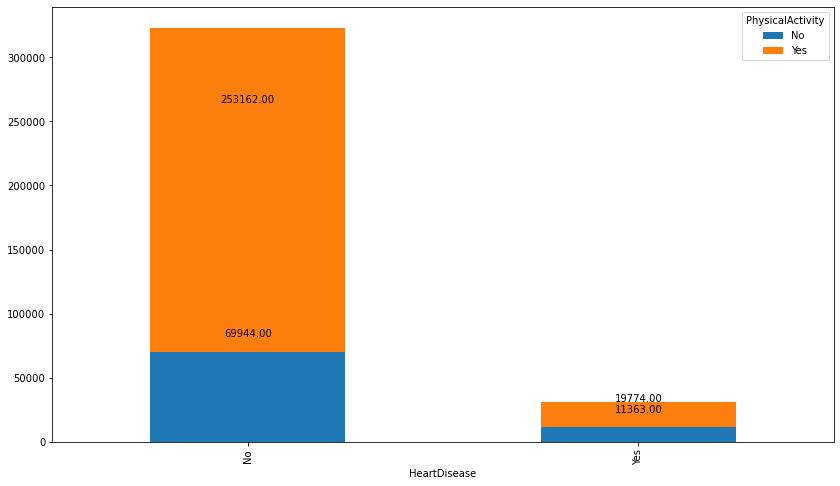

In [811]:
tt=pd.crosstab(df['HeartDisease'],df['PhysicalActivity']).plot.bar(stacked=True)
for p in tt.patches: # use for loop to annotate each bin of the plot
    tt.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 15), textcoords = 'offset points')

<Figure size 432x504 with 0 Axes>

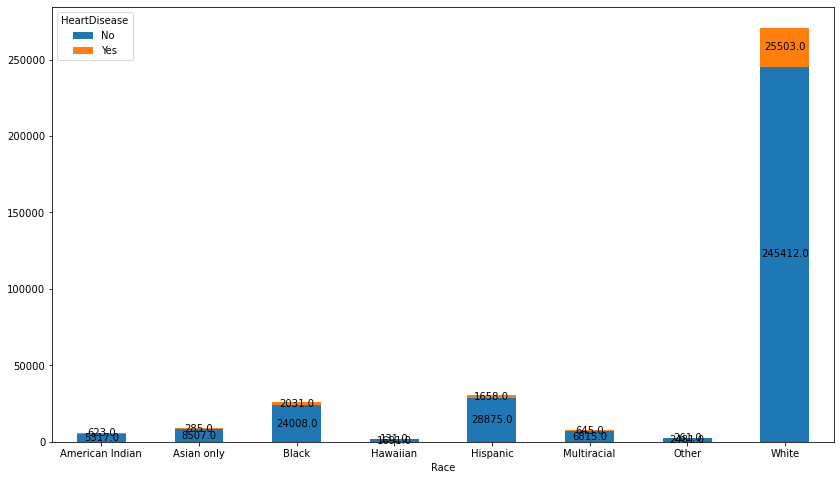

In [828]:
plt.figure(figsize=(6,7))
tt=pd.crosstab(df['Race'],df['HeartDisease']).plot.bar(stacked=True)
plt.xticks(rotation = 0)
# for p in tt.patches: # use for loop to annotate each bin of the plot
#     tt.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
#            xytext = (0, 15), textcoords = 'offset points')
for bar in tt.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    tt.text(label_x, label_y, label_text, ha='center',    
            va='center')

In [835]:
tt=pd.crosstab(df['Race'],df['HeartDisease'])
pd.DataFrame(tt).transpose()

Race,American Indian,Asian only,Black,Hawaiian,Hispanic,Multiracial,Other,White
HeartDisease,,,,,,,,
No,5317,8507,24008,1691,28875,6815,2481,245412
Yes,623,285,2031,131,1658,645,261,25503


<Figure size 1440x576 with 0 Axes>

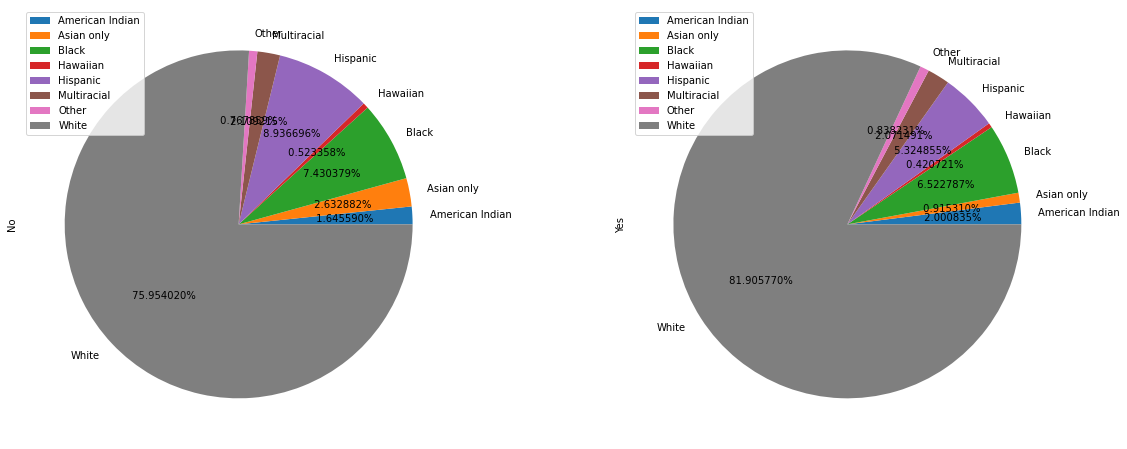

In [840]:
#barplot
plt.figure(figsize=(20,8))
pd.crosstab(df['Race'],df['HeartDisease'],).plot(kind='pie',subplots=True,figsize=(20,8),autopct='%0 f%%')
plt.tight_layout=True

plt.show()

In [852]:
tt=pd.crosstab(df['AgeCategory'],df['HeartDisease'])
pd.DataFrame(tt).transpose()

AgeCategory,18 to 24,25 to 29,30 to 34,35 to 39,40 to 44,45 to 49,50 to 54,55 to 59,60 to 64,65 to 69,70 to 74,75 to 79,80 plus
HeartDisease,,,,,,,,,,,,,
No,22799,18296,20188,22021,22218,22709,26023,29901,33096,36327,28698,19355,21475
Yes,150,146,255,339,556,841,1584,2451,3676,4817,5412,4556,6354


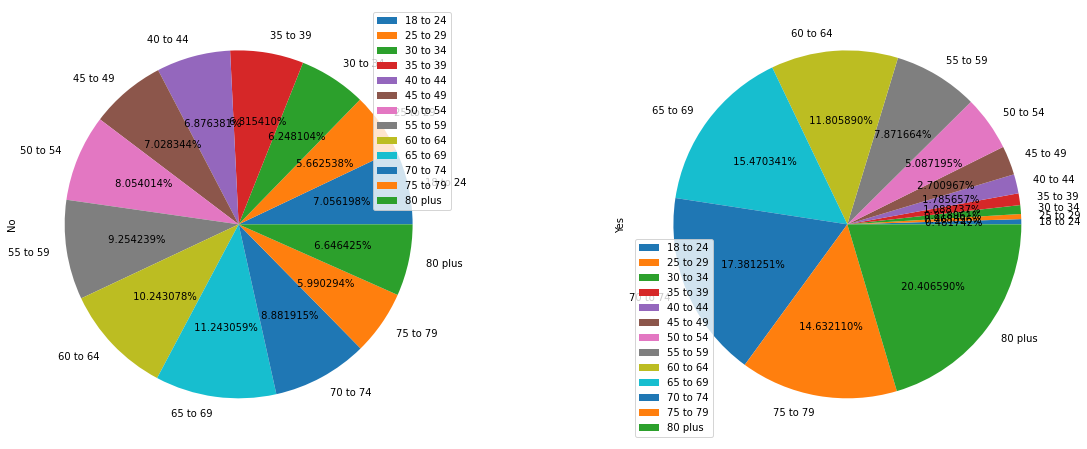

In [850]:
# #barplot
# plt.figure(figsize=(20,8))
pd.crosstab(df['AgeCategory'],df['HeartDisease'],).plot(kind='pie',subplots=True,figsize=(20,8),autopct='%0 f%%')



plt.show()

In [853]:
df['HeartDisease'].value_counts()

No     323106
Yes     31137
Name: HeartDisease, dtype: int64

In [859]:
tt=pd.crosstab(df['KidneyDisease'],df['HeartDisease'])
pd.DataFrame(tt)

HeartDisease,No,Yes
KidneyDisease,,
No,9957,4153
Yes,313149,26984


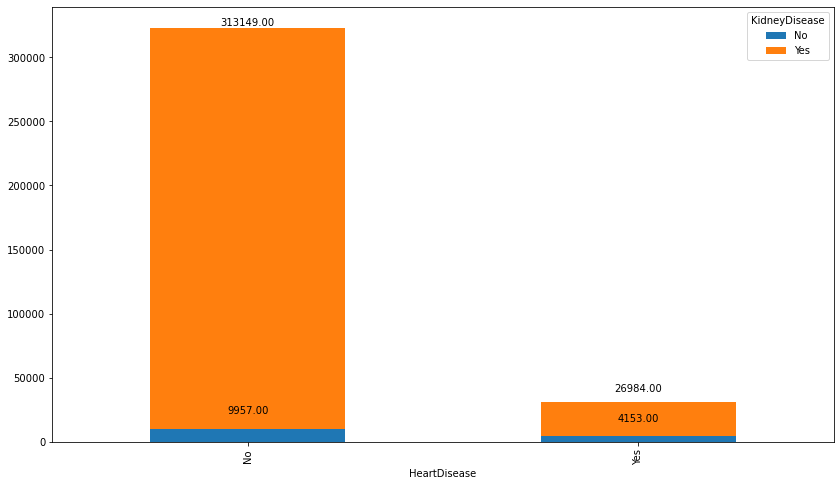

In [861]:
tt=pd.crosstab(df['HeartDisease'],df['KidneyDisease']).plot.bar(stacked=True)
for p in tt.patches: # use for loop to annotate each bin of the plot
    tt.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 15), textcoords = 'offset points')

In [868]:
df['Stroke'].value_counts()

No     340461
Yes     13782
Name: Stroke, dtype: int64

ValueError: DataFrame constructor not properly called!

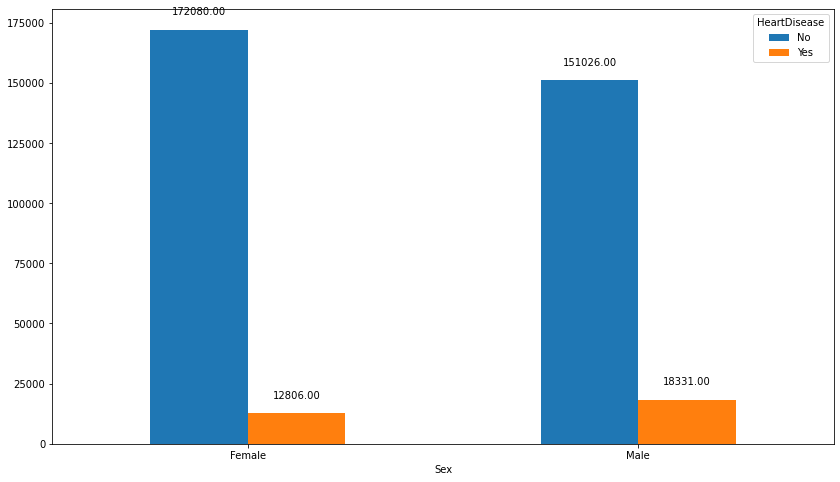

In [877]:
tt=pd.crosstab(df['Sex'],df['HeartDisease']).plot(kind='bar')
for p in tt.patches: # use for loop to annotate each bin of the plot
    tt.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 15), textcoords = 'offset points')
plt.xticks(rotation = 0)
pd.DataFrame(tt)

In [875]:
tt=pd.crosstab(df['Sex'],df['HeartDisease'])
pd.DataFrame(tt)

HeartDisease,No,Yes
Sex,,
Female,172080,12806
Male,151026,18331


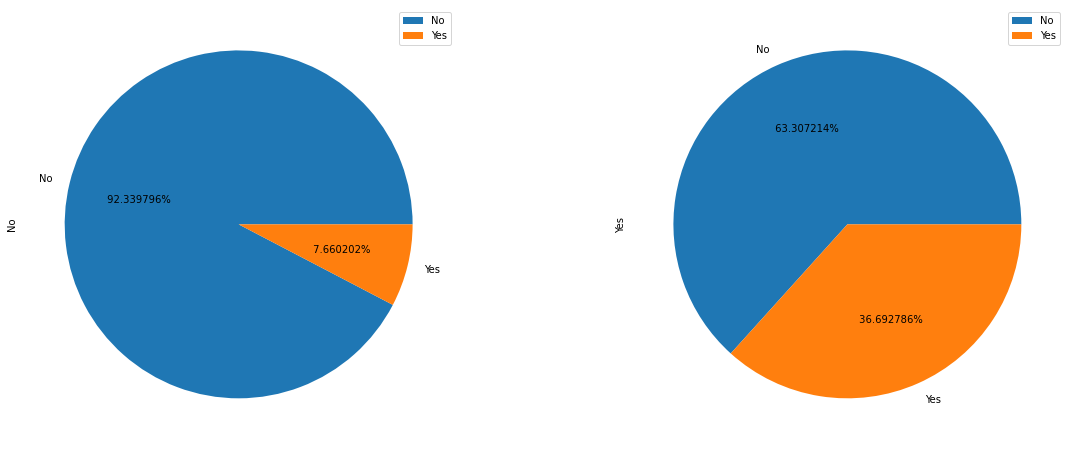

In [865]:
# #barplot
# plt.figure(figsize=(20,8))
pd.crosstab(df['HeartDisease'],df['Stroke'],).plot(kind='pie',subplots=True,figsize=(20,8),autopct='%0 f%%')



plt.show()

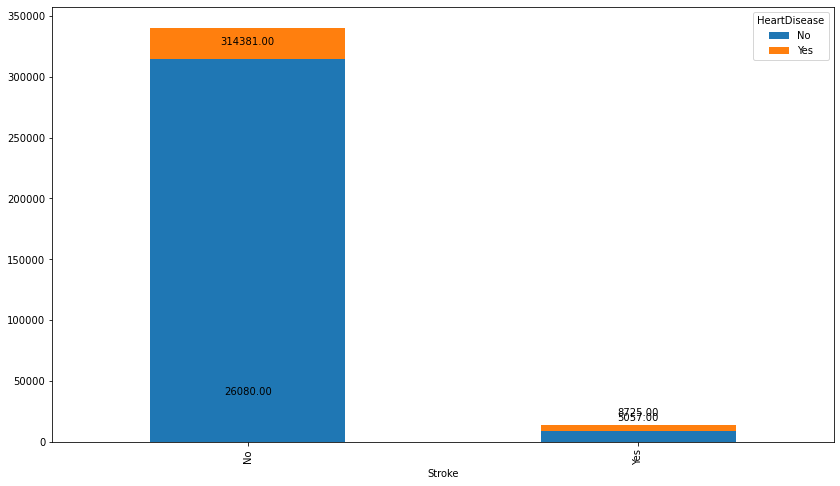

In [869]:
tt=pd.crosstab(df['Stroke'],df['HeartDisease']).plot.bar(stacked=True)
for p in tt.patches: # use for loop to annotate each bin of the plot
    tt.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 15), textcoords = 'offset points')

In [870]:
pd.crosstab(df['Stroke'],df['HeartDisease'])

HeartDisease,No,Yes
Stroke,,
No,314381,26080
Yes,8725,5057


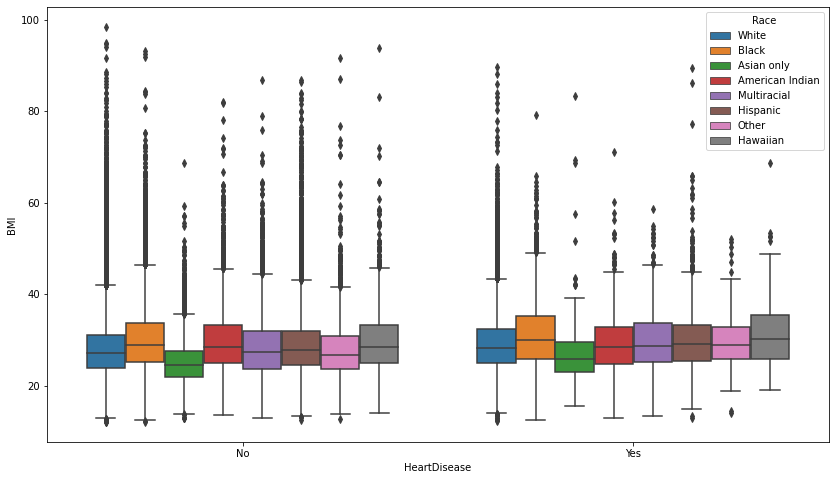

In [889]:
sns.boxplot(y=df['BMI'],x=df['HeartDisease'],hue=df['Race'])
plt.show()

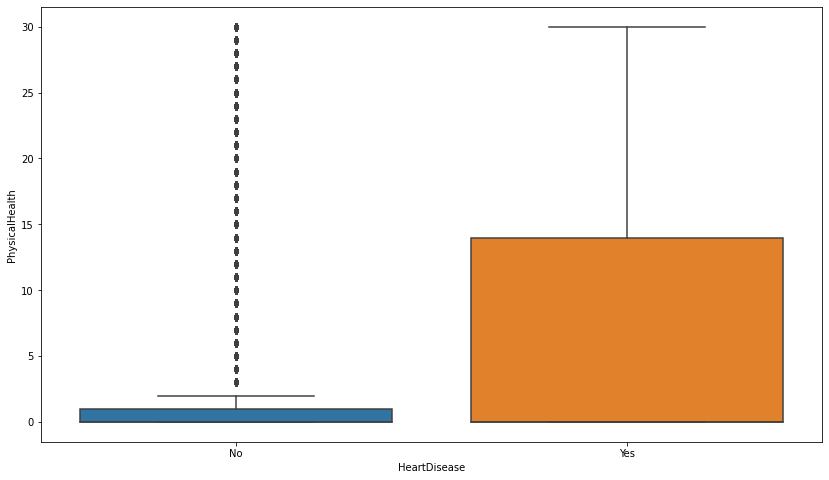

In [891]:
sns.boxplot(y=df['PhysicalHealth'],x=df['HeartDisease'])
plt.show()

<AxesSubplot:>

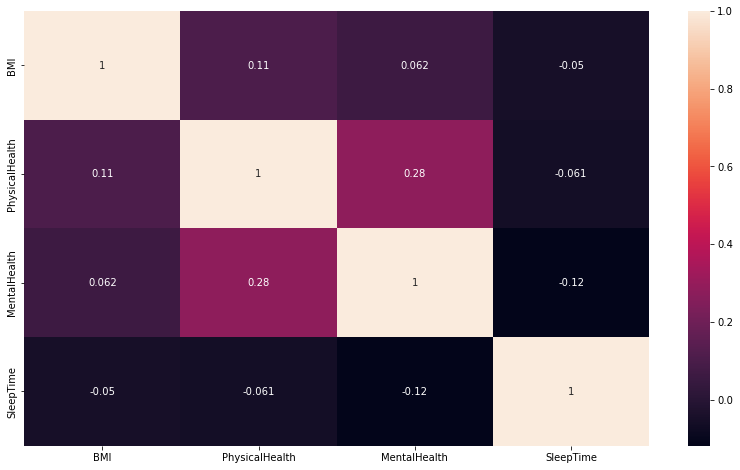

In [896]:
sns.heatmap(df.corr(),annot=True,)

In [895]:
df=df.drop('Unnamed: 0',1)

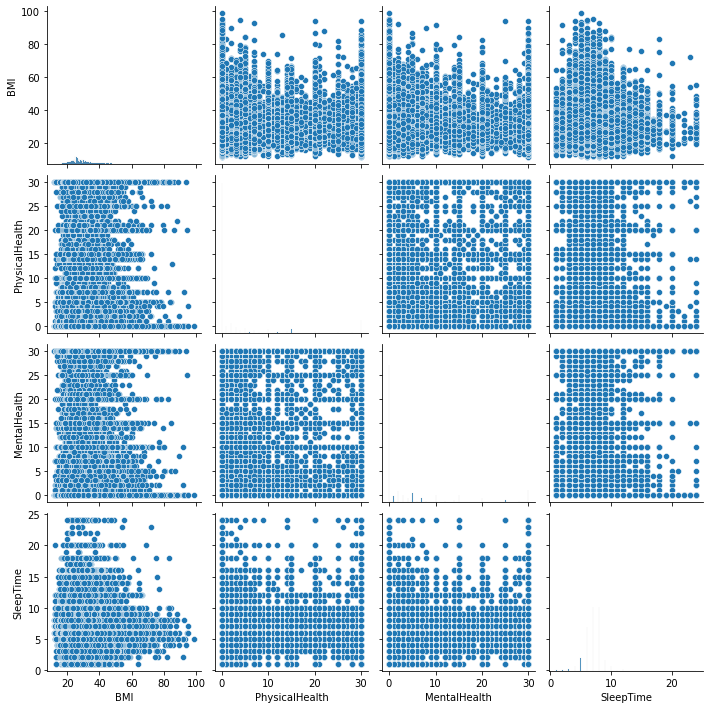

In [900]:
sns.pairplot(df,hue=df['S'])

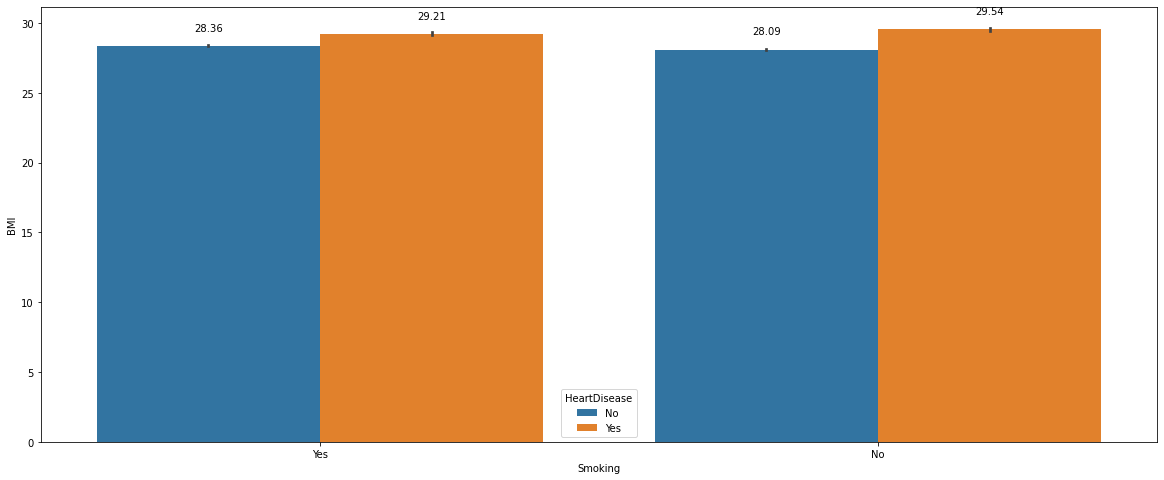

In [14]:
#Q &C
plt.figure(figsize=(20,8))
ax=sns.barplot(y=df['BMI'],x=df['Smoking'],hue=df['HeartDisease']) 
for p in ax.patches: # use for loop to annotate each bin of the plot
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 15), textcoords = 'offset points')

In [555]:
# df.isna().sum()

In [556]:
# df1=df.copy()

In [557]:
# df[df['PhysicalHealth'].isna()]

In [558]:
# df1[df1['GenHealth']=='No'].count() #we seperated the rows with Genhealth is NO

In [559]:
# df2=df1[df1['GenHealth']=='No'] #df2 is new data frame with with genhealth is NO

In [560]:
# df2=df2.drop('GenHealth',1)

In [561]:
df1.PhysicalHealth

0          3.0
1          NaN
4          NaN
5         20.0
6          NaN
          ... 
401953     NaN
401954     NaN
401955     NaN
401956     NaN
401957     2.0
Name: PhysicalHealth, Length: 357633, dtype: float64

In [562]:
#  df1[df1['PhysicalHealth'].isna()] #nan value is 0 mean no disease before that days

In [563]:
df1['PhysicalHealth']=df1['PhysicalHealth'].replace(np.NaN,0)

In [564]:
df1['MentalHealth']=df1['MentalHealth'].replace(np.NaN,0)

In [565]:
# genhealth 19
# physical 19


In [566]:
# df2.isnull().sum()

In [638]:
df1=df1.dropna()

In [637]:
# df1[(df1['BMI']>27) &(df1['MentalHealth']==0) ]

In [599]:
df1.head()

,PhysicalActivity,HeartDisease,Race,AgeCategory,BMI,AlcoholDrinking,PhysicalHealth,MentalHealth,SleepTime,Stroke,Asthma,SkinCancer,KidneyDisease,Diabetic,DiffWalking,Smoking,Sex,GenHealth
0,Yes,No,White,55 to 59,16.60,No,3.0,30.0,5.0,No,No,Yes,Yes,Yes,No,Yes,Female,Very Good
1,Yes,No,Black,65 to 69,29.18,No,0.0,0.0,7.0,No,No,No,Yes,No,No,No,Female,Good
4,Yes,No,White,80 plus,20.34,No,0.0,0.0,7.0,Yes,Yes,No,Yes,No,No,No,Female,Very Good
5,Yes,No,White,65 to 69,26.58,No,20.0,30.0,8.0,No,No,No,Yes,Yes,No,Yes,Male,Fair
6,No,No,White,75 to 79,24.21,No,0.0,0.0,6.0,No,Yes,Yes,Yes,No,No,No,Female,Good


In [639]:
df1.shape

(354243, 18)

In [640]:
df1.isna().sum()

PhysicalActivity    0
HeartDisease        0
Race                0
AgeCategory         0
BMI                 0
AlcoholDrinking     0
PhysicalHealth      0
MentalHealth        0
SleepTime           0
Stroke              0
Asthma              0
SkinCancer          0
KidneyDisease       0
Diabetic            0
DiffWalking         0
Smoking             0
Sex                 0
GenHealth           0
dtype: int64

# Base model without Treating Outliers

In [641]:
# store the target variable 'Chance of Admit' in a dataframe 'df_target'
df_target = df1['HeartDisease']

# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'Chance of Admit' using drop()
# 'axis = 1' drops the specified column
df_feature = df1.drop('HeartDisease', axis = 1)

In [642]:
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.number]' will include all the numerical variables
df_num = df1.select_dtypes(include = [np.number])

# display numerical features
df_num.columns

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')

In [643]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.object]' will include all the categorical variables
df_cat = df1.select_dtypes(include = [np.object])

# display categorical features
df_cat.columns

Index(['PhysicalActivity', 'HeartDisease', 'Race', 'AgeCategory',
       'AlcoholDrinking', 'Stroke', 'Asthma', 'SkinCancer', 'KidneyDisease',
       'Diabetic', 'DiffWalking', 'Smoking', 'Sex', 'GenHealth'],
      dtype='object')

In [644]:
df1.isnull().sum()

PhysicalActivity    0
HeartDisease        0
Race                0
AgeCategory         0
BMI                 0
AlcoholDrinking     0
PhysicalHealth      0
MentalHealth        0
SleepTime           0
Stroke              0
Asthma              0
SkinCancer          0
KidneyDisease       0
Diabetic            0
DiffWalking         0
Smoking             0
Sex                 0
GenHealth           0
dtype: int64

In [645]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

# scale Data

In [646]:
# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numerical columns
# standardize all the columns of the dataframe 'df_num'
num_scaled = X_scaler.fit_transform(df_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

In [647]:
df_num_scaled.skew()

BMI               1.362718
PhysicalHealth    2.604332
MentalHealth      2.345050
SleepTime         0.703751
dtype: float64

In [648]:
df_num_scaled.shape,dummy_var.shape

((354243, 4), (354243, 35))

In [651]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
X = pd.concat([df_num_scaled, dummy_var], axis = 1)

# display first five observations
X.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,PhysicalActivity_Yes,HeartDisease_Yes,Race_Asian only,Race_Black,Race_Hawaiian,Race_Hispanic,...,KidneyDisease_Yes,Diabetic_No,Diabetic_Yes,DiffWalking_Yes,Smoking_Yes,Sex_Male,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very Good
0,-1.837371,-0.045772,3.282477,-1.436831,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.138438,-0.422309,-0.484750,-0.064788,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.249968,-0.422309,-0.484750,-0.064788,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.269917,2.087938,3.282477,0.621233,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.642148,-0.422309,-0.484750,-0.750810,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [634]:
X.shape

(396848, 39)

In [635]:
df_target.shape

(354243,)

# Train Test Split

In [612]:
import statsmodels.api as sm
import statsmodels

# **Concatenate numerical and dummy encoded categorical variables**

In [613]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [614]:
X=df_new1.drop(['HeartDisease_Yes'],1)

In [615]:
y=df_new1['HeartDisease_Yes']

In [616]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 10, test_size = 0.2,stratify=y)

In [617]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((283394, 38), (70849, 38), (283394,), (70849,))

In [618]:
LR = LogisticRegression()

In [619]:
logistic = LR.fit(X_train,y_train)

In [620]:
y_prediction = LR.predict(X_test)

In [621]:
y_prediction

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [622]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [623]:
accuracy_score(y_test,y_prediction)

0.9127722339059126

## Train Results 

In [624]:
print(confusion_matrix(y_test,y_prediction))  


[[63980   642]
 [ 5538   689]]


In [625]:
print(classification_report(y_test,y_prediction)) 


              precision    recall  f1-score   support

           0       0.92      0.99      0.95     64622
           1       0.52      0.11      0.18      6227

    accuracy                           0.91     70849
   macro avg       0.72      0.55      0.57     70849
weighted avg       0.88      0.91      0.89     70849



In [626]:
print(roc_auc_score(y_test, y_prediction))

0.5503562422332177


In [627]:
from sklearn.metrics import ConfusionMatrixDisplay

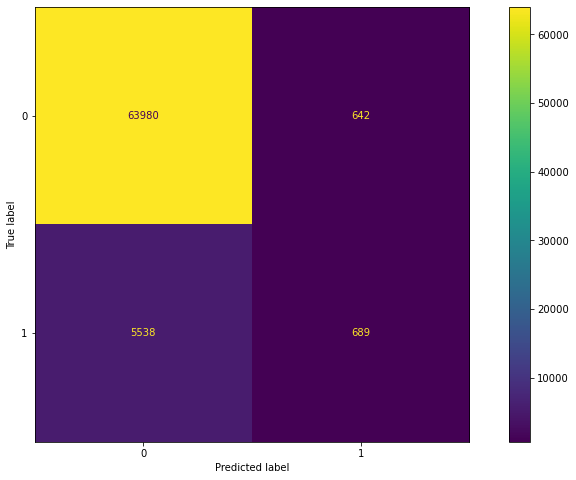

In [628]:
cm = confusion_matrix(y_test,y_prediction)
d = ConfusionMatrixDisplay(cm, display_labels=logistic.classes_)
d.plot()
plt.show()

In [629]:
df2=df1.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numerical columns
# standardize all the columns of the dataframe 'df_num'
num_scaled = X_scaler.fit_transform(df_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size =0. 30,stratify=y)